In [1]:
import os
import json
import sqlite3
import pandas as pd
from tqdm import tqdm
import csv
import plotly.express as px
# import matplotlib as plt
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import geopandas as gpd

In [2]:
db = sqlite3.connect('crimes.db')
cur = db.cursor()

df_barnet = pd.read_sql("""SELECT *
                FROM crimes
                WHERE "LSOA_name" LIKE 'Barnet%' AND "Crime_type" LIKE 'Burglary'
                """, con=db)
df_barnet

Crime_ID    Month   
0                                                         2010-12  \
1                                                         2010-12   
2                                                         2010-12   
3                                                         2010-12   
4                                                         2010-12   
...                                                  ...      ...   
44187  fda0870be993d2c9352ae14a540bf529c15a7aa9d92a4e...  2023-03   
44188  c6c2d9a772695865f4ca33fce59c26c48fe3a1cdac8c22...  2023-03   
44189  e5bab2bd4f31de44515dbf125b85284392d0349139a1d3...  2023-03   
44190  823465427f8764e250a48312715a4bd87e8012412046c6...  2023-03   
44191  50b5bbf4987109ee189f8a736ec7e92365b25169b7f783...  2023-03   

                       Reported_by                 Falls_within  Longitude   
0      Metropolitan Police Service  Metropolitan Police Service  -0.201877  \
1      Metropolitan Police Service  Metropolitan Police Service  -0.207853   
2      Metropolitan Police Service  Metropolitan Police Service  -0.202510   
3      Metropolitan Police Service  Metropolitan Police Service  -0.206779   
4      Metropolitan Police Service  Metropolitan Police Service  -0.209537   
...                            ...                          ...        ...   
44187  Metropolitan Police Service  Metropolitan Police Service  -0.202163   
44188  Metropolitan Police Service  Metropolitan Police Service  -0.202163   
44189  Metropolitan Police Service  Metropolitan Police Service  -0.197843   
44190  Metropolitan Police Service  Metropolitan Police Service  -0.199449   
44191  Metropolitan Police Service  Metropolitan Police Service  -0.197843   

        Latitude                  Location  LSOA_code    LSOA_name Crime_type   
0      51.655538    On or near High Street  E01000248  Barnet 001A   Burglary  \
1      51.654317     On or near The Avenue  E01000248  Barnet 001A   Burglary   
2      51.656348     On or near Bruce Road  E01000248  Barnet 001A   Burglary   
3      51.654768      On or near The Drive  E01000248  Barnet 001A   Burglary   
4      51.655223  On or near Marriott Road  E01000249  Barnet 001B   Burglary   
...          ...                       ...        ...          ...        ...   
44187  51.559100   On or near Hocroft Road  E01000139  Barnet 041B   Burglary   
44188  51.559100   On or near Hocroft Road  E01000139  Barnet 041B   Burglary   
44189  51.561093    On or near Church Walk  E01000140  Barnet 041C   Burglary   
44190  51.563896  On or near Llanelly Road  E01000140  Barnet 041C   Burglary   
44191  51.561093    On or near Church Walk  E01000140  Barnet 041C   Burglary   

      Last_outcome_category Context  
0                                    
1                                    
2                                    
3                                    
4                                    
...                     ...     ...  
44187   Under investigation          
44188   Under investigation          
44189   Under investigation          
44190   Under investigation          
44191   Under investigation          

[44192 rows x 12 columns]

In [3]:
wards = pd.read_csv('C:/Users/niekv/Downloads/LSOA_(2021)_to_Ward_to_Lower_Tier_Local_Authority_(May_2022)_Lookup_for_England_and_Wales.csv')
wards = wards[wards['LSOA21NM'].str.contains('Barnet')]
wards_sorted = wards.groupby('WD22NM')['LSOA21NM'].apply(list).reset_index(name='LSAO name')
wards_list = wards_sorted.values.tolist()

df_barnet['Wards'] = 1
df_barnet['Wards num'] = 1
for i in range(len(df_barnet)):
    if df_barnet['LSOA_name'][i] in wards_list[0][1]:
        df_barnet['Wards'][i] = 'Barnet Vale'
        df_barnet['Wards num'][i] = '1'
    elif df_barnet['LSOA_name'][i] in wards_list[1][1]:
        df_barnet['Wards'][i] = wards_list[1][0]
        df_barnet['Wards num'][i] = '2'
    elif df_barnet['LSOA_name'][i] in wards_list[2][1]:
        df_barnet['Wards'][i] = wards_list[2][0]
        df_barnet['Wards num'][i] = '3'
    elif df_barnet['LSOA_name'][i] in wards_list[3][1]:
        df_barnet['Wards'][i] = wards_list[3][0]
        df_barnet['Wards num'][i] = '3'
    elif df_barnet['LSOA_name'][i] in wards_list[4][1]:
        df_barnet['Wards'][i] = wards_list[4][0]
        df_barnet['Wards num'][i] = '4'
    elif df_barnet['LSOA_name'][i] in wards_list[5][1]:
        df_barnet['Wards'][i] = wards_list[5][0]
        df_barnet['Wards num'][i] = '5'
    elif df_barnet['LSOA_name'][i] in wards_list[6][1]:
        df_barnet['Wards'][i] = wards_list[6][0]
        df_barnet['Wards num'][i] = '6'
    elif df_barnet['LSOA_name'][i] in wards_list[7][1]:
        df_barnet['Wards'][i] = wards_list[7][0]
        df_barnet['Wards num'][i] = '7'
    elif df_barnet['LSOA_name'][i] in wards_list[8][1]:
        df_barnet['Wards'][i] = wards_list[8][0]
        df_barnet['Wards num'][i] = '8'
    elif df_barnet['LSOA_name'][i] in wards_list[9][1]:
        df_barnet['Wards'][i] = wards_list[9][0]
        df_barnet['Wards num'][i] = '9'
    elif df_barnet['LSOA_name'][i] in wards_list[10][1]:
        df_barnet['Wards'][i] = wards_list[10][0]
        df_barnet['Wards num'][i] = '10'
    elif df_barnet['LSOA_name'][i] in wards_list[11][1]:
        df_barnet['Wards'][i] = wards_list[11][0]
        df_barnet['Wards num'][i] = '11'
    elif df_barnet['LSOA_name'][i] in wards_list[12][1]:
        df_barnet['Wards'][i] = wards_list[12][0]
        df_barnet['Wards num'][i] = '12'
    elif df_barnet['LSOA_name'][i] in wards_list[13][1]:
        df_barnet['Wards'][i] = wards_list[13][0]
        df_barnet['Wards num'][i] = '13'
    elif df_barnet['LSOA_name'][i] in wards_list[14][1]:
        df_barnet['Wards'][i] = wards_list[14][0]
        df_barnet['Wards num'][i] = '14'
    elif df_barnet['LSOA_name'][i] in wards_list[15][1]:
        df_barnet['Wards'][i] = wards_list[15][0]
        df_barnet['Wards num'][i] = '15'
    elif df_barnet['LSOA_name'][i] in wards_list[16][1]:
        df_barnet['Wards'][i] = wards_list[16][0]
        df_barnet['Wards num'][i] = '16'
    elif df_barnet['LSOA_name'][i] in wards_list[17][1]:
        df_barnet['Wards'][i] = wards_list[17][0]
        df_barnet['Wards num'][i] = '17'
    elif df_barnet['LSOA_name'][i] in wards_list[18][1]:
        df_barnet['Wards'][i] = wards_list[18][0]
        df_barnet['Wards num'][i] = '18'
    elif df_barnet['LSOA_name'][i] in wards_list[19][1]:
        df_barnet['Wards'][i] = wards_list[19][0]
        df_barnet['Wards num'][i] = '19'
    elif df_barnet['LSOA_name'][i] in wards_list[20][1]:
        df_barnet['Wards'][i] = wards_list[20][0]
        df_barnet['Wards num'][i] = '20'
    elif df_barnet['LSOA_name'][i] in wards_list[21][1]:
        df_barnet['Wards'][i] = wards_list[21][0]
        df_barnet['Wards num'][i] = '21'
    elif df_barnet['LSOA_name'][i] in wards_list[22][1]:
        df_barnet['Wards'][i] = wards_list[22][0]
        df_barnet['Wards num'][i] = '22'
    elif df_barnet['LSOA_name'][i] in wards_list[23][1]:
        df_barnet['Wards'][i] = wards_list[23][0]
        df_barnet['Wards num'][i] = '23'
    else:
        df_barnet.drop(i)

wards_l = ['Barnet Vale',
'Brunswick Park',
'Burnt Oak',
'Childs Hill',
'Colindale North',
'Colindale South',
'Cricklewood',
'East Barnet',
'East Finchley',
'Edgware',
'Edgwarebury',
'Finchley Church End',
'Friern Barnet',
'Garden Suburb',
'Golders Green',
'Hendon',
'High Barnet',
'Mill Hill',
'Totteridge & Woodside',
'Underhill',
'West Finchley',
'West Hendon',
'Whetstone',
'Woodhouse']

df_barnet_filtered = df_barnet[df_barnet['Wards'].isin(wards_l)]
df_barnet_filtered

C:\Users\niekv\AppData\Local\Temp\ipykernel_26092\3621821869.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barnet['Wards'][i] = wards_list[16][0]
C:\Users\niekv\AppData\Local\Temp\ipykernel_26092\3621821869.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_barnet['Wards num'][i] = '16'


Crime_ID    Month   
0                                                         2010-12  \
1                                                         2010-12   
2                                                         2010-12   
3                                                         2010-12   
4                                                         2010-12   
...                                                  ...      ...   
44187  fda0870be993d2c9352ae14a540bf529c15a7aa9d92a4e...  2023-03   
44188  c6c2d9a772695865f4ca33fce59c26c48fe3a1cdac8c22...  2023-03   
44189  e5bab2bd4f31de44515dbf125b85284392d0349139a1d3...  2023-03   
44190  823465427f8764e250a48312715a4bd87e8012412046c6...  2023-03   
44191  50b5bbf4987109ee189f8a736ec7e92365b25169b7f783...  2023-03   

                       Reported_by                 Falls_within  Longitude   
0      Metropolitan Police Service  Metropolitan Police Service  -0.201877  \
1      Metropolitan Police Service  Metropolitan Police Service  -0.207853   
2      Metropolitan Police Service  Metropolitan Police Service  -0.202510   
3      Metropolitan Police Service  Metropolitan Police Service  -0.206779   
4      Metropolitan Police Service  Metropolitan Police Service  -0.209537   
...                            ...                          ...        ...   
44187  Metropolitan Police Service  Metropolitan Police Service  -0.202163   
44188  Metropolitan Police Service  Metropolitan Police Service  -0.202163   
44189  Metropolitan Police Service  Metropolitan Police Service  -0.197843   
44190  Metropolitan Police Service  Metropolitan Police Service  -0.199449   
44191  Metropolitan Police Service  Metropolitan Police Service  -0.197843   

        Latitude                  Location  LSOA_code    LSOA_name Crime_type   
0      51.655538    On or near High Street  E01000248  Barnet 001A   Burglary  \
1      51.654317     On or near The Avenue  E01000248  Barnet 001A   Burglary   
2      51.656348     On or near Bruce Road  E01000248  Barnet 001A   Burglary   
3      51.654768      On or near The Drive  E01000248  Barnet 001A   Burglary   
4      51.655223  On or near Marriott Road  E01000249  Barnet 001B   Burglary   
...          ...                       ...        ...          ...        ...   
44187  51.559100   On or near Hocroft Road  E01000139  Barnet 041B   Burglary   
44188  51.559100   On or near Hocroft Road  E01000139  Barnet 041B   Burglary   
44189  51.561093    On or near Church Walk  E01000140  Barnet 041C   Burglary   
44190  51.563896  On or near Llanelly Road  E01000140  Barnet 041C   Burglary   
44191  51.561093    On or near Church Walk  E01000140  Barnet 041C   Burglary   

      Last_outcome_category Context        Wards Wards num  
0                                    High Barnet        16  
1                                    High Barnet        16  
2                                    High Barnet        16  
3                                    High Barnet        16  
4                                    High Barnet        16  
...                     ...     ...          ...       ...  
44187   Under investigation          Childs Hill         3  
44188   Under investigation          Childs Hill         3  
44189   Under investigation          Childs Hill         3  
44190   Under investigation          Childs Hill         3  
44191   Under investigation          Childs Hill         3  

[42562 rows x 14 columns]

In [7]:
df_high_barnet = df_barnet_filtered[df_barnet_filtered['Wards'] == 'High Barnet']
df_underhill = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Underhill']
df_east_barnet = df_barnet_filtered[df_barnet_filtered['Wards'] == 'East Barnet']
df_barnet_vale = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Barnet Vale']
df_edgwarebury = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Edgwarebury']
df_totteridge_and_woodside = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Totteridge & Woodside']
df_whetstone = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Whetstone']
df_brunswick_park = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Brunswick Park']
df_woodhouse = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Woodhouse']
df_edgware = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Edgware']
df_friern_barnet = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Friern Barnet']
df_mill_hill = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Mill Hill']
df_burnt_oak = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Burnt Oak']
df_west_finchley = df_barnet_filtered[df_barnet_filtered['Wards'] == 'West Finchley']
df_finchley_church_end = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Finchley Church End']
df_colindale_north = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Colindale North']
df_east_finchley = df_barnet_filtered[df_barnet_filtered['Wards'] == 'East Finchley']
df_hendon = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Hendon']
df_garden_suburb = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Garden Suburb']
df_west_hendon = df_barnet_filtered[df_barnet_filtered['Wards'] == 'West Hendon']
df_golders_green = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Golders Green']
df_childs_hill = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Childs Hill']
df_cricklewood = df_barnet_filtered[df_barnet_filtered['Wards'] == 'Cricklewood']

df_wards = [df_high_barnet, df_underhill, df_east_barnet, df_barnet_vale, df_edgwarebury, df_totteridge_and_woodside, df_whetstone, df_brunswick_park, df_woodhouse, df_edgware, df_friern_barnet, 
            df_mill_hill, df_burnt_oak, df_west_finchley, df_finchley_church_end, df_colindale_north, df_east_finchley, df_hendon, df_garden_suburb, df_west_hendon, df_golders_green,
            df_childs_hill, df_cricklewood]
df_wards


[                                                Crime_ID    Month   
 0                                                         2010-12  \
 1                                                         2010-12   
 2                                                         2010-12   
 3                                                         2010-12   
 4                                                         2010-12   
 ...                                                  ...      ...   
 43962  1b0f5b54b22756b1f34b5bec61722c2c908d8d0a9a2f69...  2023-03   
 43963  e52bf021cbf673d1a3742f2ffc7033f164958ebdf5ad25...  2023-03   
 43964  7a76fc7afe13407ff094607b6a800d8c74a7034435a950...  2023-03   
 43965  5b6d78a73254fdd37f71f290fc62e262e1bd5194c28435...  2023-03   
 43986  633fb9897f36482cc575c45d17f0761a7457add59f58da...  2023-03   
 
                        Reported_by                 Falls_within  Longitude   
 0      Metropolitan Police Service  Metropolitan Police Service  -0.201877  \


In [8]:
df_high_barnet_grouped = df_high_barnet.groupby('Month')
df_high_barnet_count = df_high_barnet_grouped.count()
df_high_barnet_count['Crime_ID'] = df_high_barnet_count['Crime_ID'].astype(int)
df_high_barnet_count = df_high_barnet_count[['Crime_ID']]
df = df_high_barnet_count.rename(columns={'Crime_ID': 'value'})
df

value
Month         
2010-12     14
2011-01     21
2011-02     15
2011-03     17
2011-04     18
...        ...
2022-10      7
2022-11     10
2023-01      9
2023-02      7
2023-03      7

[147 rows x 1 columns]

In [9]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.stattools import acf
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape
import statsmodels.api as sm


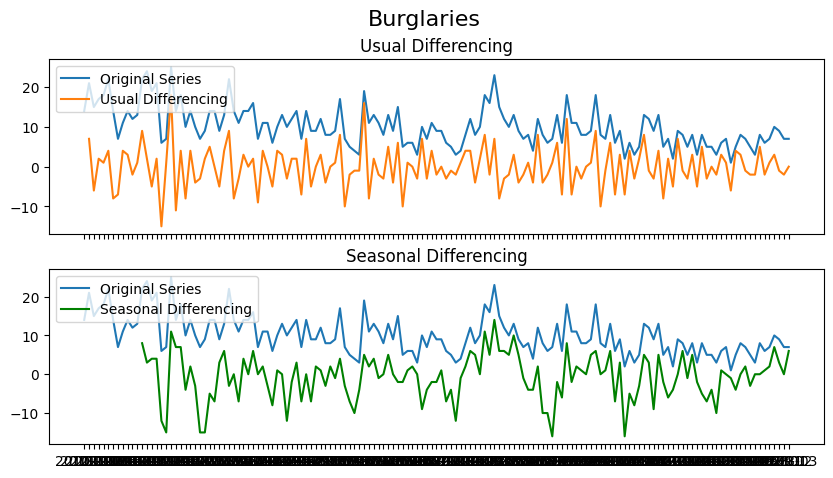

In [10]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df.value[:], label='Original Series')
axes[0].plot(df.value[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(df.value[:], label='Original Series')
axes[1].plot(df.value[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Burglaries', fontsize=16)
plt.show()

In [12]:
# Function to forecast data
def predictions_func(df, train_size, name):

    df_grouped = df.groupby('Month')
    df_count = df_grouped.count()
    df_count['Crime_ID'] = df_count['Crime_ID'].astype(int)
    df_count = df_count[['Crime_ID']]
    df = df_count.rename(columns={'Crime_ID': 'value'})
    
    # df.index = df.index.get_level_values(0)
    # df = df.reset_index()

    # df['Month']=pd.to_datetime(df['Month'])
    # df.set_index('Month', inplace = True)
    df

    # Seasonal ARIMA model
    # Create Training and Test
    train = df.value[:train_size]
    test = df.value[train_size:]


    smodel = pm.auto_arima(train, start_p=1, start_q=1, test='adf',
                        max_p=10, max_q=10, m=12,
                        seasonal=True, d=None, D=1, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)
    summary = smodel.summary()

    
    
    model = smodel  # seeded from the model we've already fit


    smodel.fit(df)
    forecast1=smodel.predict(n_periods=12, return_conf_int=True)
    forecast_range=pd.date_range(start='2023-04-01', periods=12,freq='MS')
    forecast1_df = forecast1[0].to_frame()
    forecast1_df['month'] = forecast_range
    forecast1_df = forecast1_df.set_index('month')
    forecast1_df = forecast1_df.rename(columns={0: 'prediction'})
    forecast1_df


    def forecast_one_step():
        fc, conf_int = model.predict(n_periods=1, return_conf_int=True, alpha=0.05)
        return (
            fc.tolist()[0],
            np.asarray(conf_int).tolist()[0])

    forecasts = []
    confidence_intervals = []

    for new_ob in test:
        fc, conf = forecast_one_step()
        forecasts.append(fc)
        confidence_intervals.append(conf)

        # Updates the existing model with a small number of MLE steps
        model.update(new_ob)

    MSE = f"Mean squared error: {mean_squared_error(test, forecasts)}"
    SMAPE = f"SMAPE: {smape(test, forecasts)}"
    AUTO_cor = sm.stats.acorr_ljungbox(forecasts, return_df=True)
    errors = {"MSE" : mean_squared_error(test, forecasts), "SMAPE" : smape(test, forecasts), "AUTO_COR" : AUTO_cor}
    # errors = 'error'
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    # --------------------- Actual vs. Predicted --------------------------
    axes[0].plot(train, color='blue', label='Training Data')
    axes[0].plot(test.index, forecasts, color='cyan',
                label='Predicted Burglaries')

    axes[0].plot(test.index, test, color='orange', label='Actual Burglaries')
    axes[0].set_title(f'Number of Burglaries in {name}')
    axes[0].set_xlabel('Dates')
    axes[0].set_ylabel('Burglaries')

    axes[0].set_xticks(np.arange(0, 147, 18).tolist(), df.index[0:147:18].tolist())
    # axes[0].set_xlim(['2019-12', '2023-03'])
    # axes[0].set_ylim([0,400])
    axes[0].legend()


    # ------------------ Predicted with confidence intervals ----------------
    axes[1].plot(train, color='blue', label='Training Data')
    axes[1].plot(test.index, forecasts, color='green',
                label='Predicted Burglaries')

    axes[1].set_title(f'Burglary Predictions & Confidence Intervals {name}')
    axes[1].set_xlabel('Dates')
    axes[1].set_ylabel('Burglaries')

    conf_int = np.asarray(confidence_intervals)
    axes[1].fill_between(test.index,
                        conf_int[:, 0], conf_int[:, 1],
                        alpha=0.9, color='orange',
                        label="Confidence Intervals")

    axes[1].set_xticks(np.arange(0, 147, 18).tolist(), df.index[0:147:18].tolist())
    axes[1].legend()
    return smodel, summary, fig, errors, forecasts, test.index, forecast1_df

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1059.655, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1015.251, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1041.590, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1006.219, Time=0.22 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.57 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1022.920, Time=0.20 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=995.959, Time=0.28 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1000.084, Time=0.13 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=0.76 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=994.842, Time=0.31 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=998.165,

(ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
       suppress_warnings=True, with_intercept=False),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                       SARIMAX Results                                      
 Dep. Variable:                                   y   No. Observations:                  107
 Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -489.285
 Date:                             Thu, 08 Jun 2023   AIC                            986.571
 Time:                                     14:59:27   BIC                            996.744
 Sample:                                 12-01-2010   HQIC                           990.680
                                       - 10-01-2019                                         
 Covariance Type:                               opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 

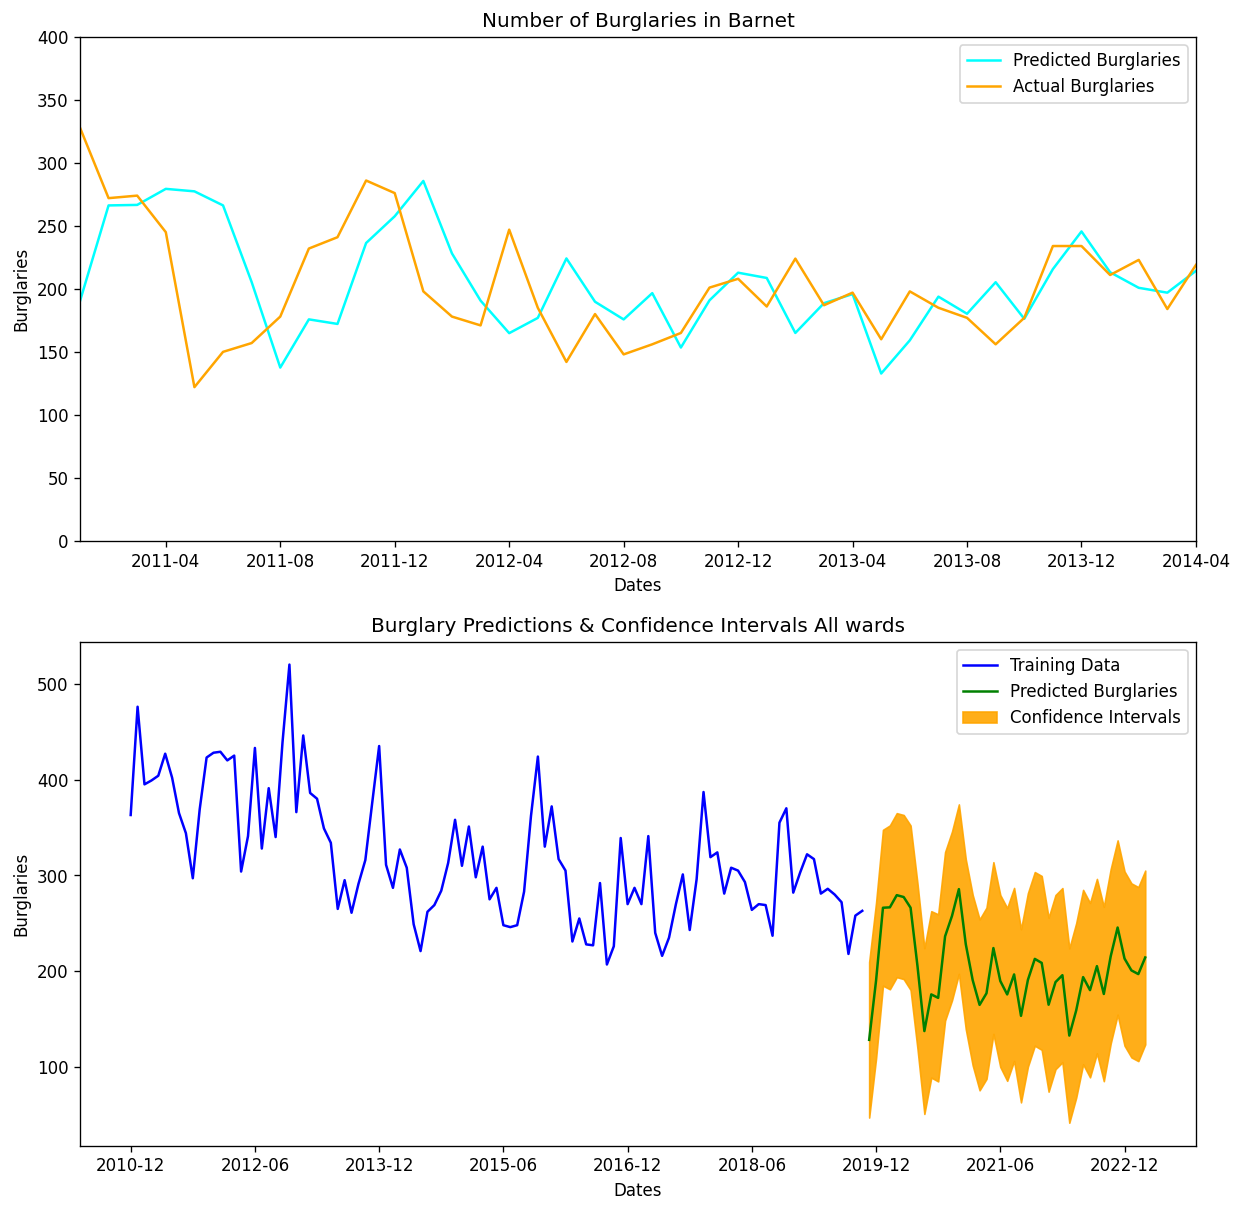

In [480]:
predictions_func(df_barnet_filtered, 107, 'All wards')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=705.040, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=679.229, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=704.565, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=697.092, Time=0.05 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=670.218, Time=0.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=678.819, Time=0.40 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=670.794, Time=0.61 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=671.280, Time=0.61 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=672.688, Time=0.59 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(1,0,0)(2,1,0)[12]             : AIC=671.278, T

C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=653.660, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=697.458, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=657.912, Time=0.17 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=656.925, Time=0.17 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=696.973, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=653.035, Time=0.30 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=694.674, Time=0.10 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=654.148, Time=0.75 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=657.215, Time=0.22 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=655.546, Time=0.90 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=653.821, Time=0.15 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=654.780, Time=0.31 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=654.759, Time=0.37 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=662.193, Time=0.10 sec
 ARIMA(0,0,2)(0,1,1)[12] intercep

C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=685.884, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=657.477, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=685.201, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=686.316, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=642.657, Time=0.46 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=644.812, Time=0.33 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=644.476, Time=0.61 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=644.053, Time=0.68 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=642.254, Time=0.40 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=656.944, Time=0.12 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, T

C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=691.615, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=664.119, Time=0.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=690.070, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=693.529, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=664.757, Time=0.44 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=662.256, Time=0.11 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=662.860, Time=0.37 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.00 sec

C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=661.141, Time=0.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=692.829, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=667.951, Time=0.16 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=657.430, Time=0.16 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=693.379, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=690.061, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=659.141, Time=0.26 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=659.207, Time=0.48 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=668.148, Time=0.14 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.56 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=665.007, Time=0.09 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=659.402, Time=0.20 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=659.403, Time=0.23 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=658.002, Time=0.14 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   

C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=652.126, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=676.129, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=657.782, Time=0.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=655.275, Time=0.13 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=675.486, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=650.260, Time=0.31 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=676.612, Time=0.12 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=652.207, Time=0.95 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=651.967, Time=0.26 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=653.213, Time=0.89 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=653.866, Time=0.11 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=652.222, Time=0.38 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=652.220, Time=0.41 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=657.945, Time=0.08 sec
 ARIMA(0,0,2)(0,1,1)[12] intercep

C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\niekv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  retur

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=733.204, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=695.353, Time=0.18 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=731.846, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=735.156, Time=0.04 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=691.653, Time=0.44 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=690.285, Time=0.28 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=693.854, Time=0.10 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=691.705, Time=0.40 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=693.324, Time=

C:\Users\niekv\AppData\Local\Temp\ipykernel_26092\3605057816.py:68: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(2, 1, figsize=(12, 12))


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=754.400, Time=0.71 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=795.404, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=772.459, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=796.866, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=753.021, Time=0.71 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=798.348, Time=0.13 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=754.244, Time=1.72 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=770.723, Time=0.40 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=1.68 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=756.002, Time=0.49 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=754.956, Time=0.71 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, T

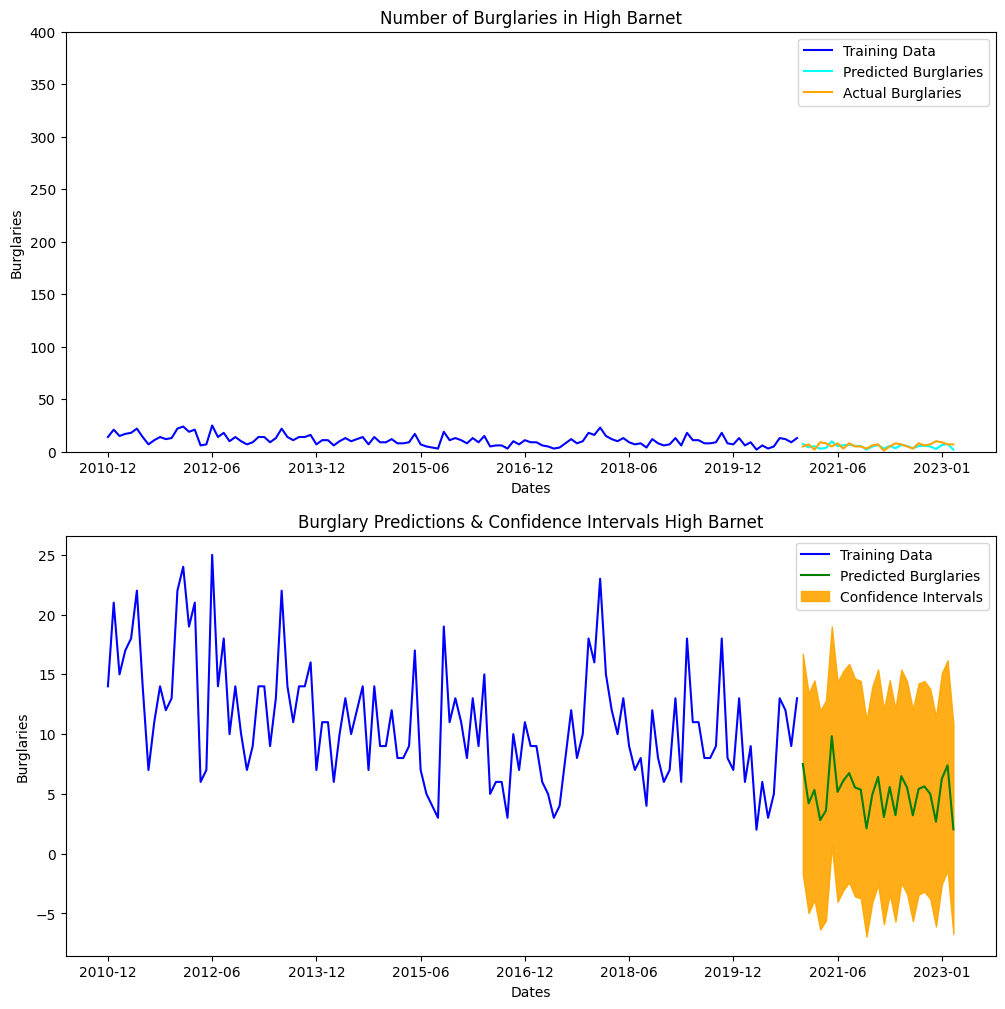

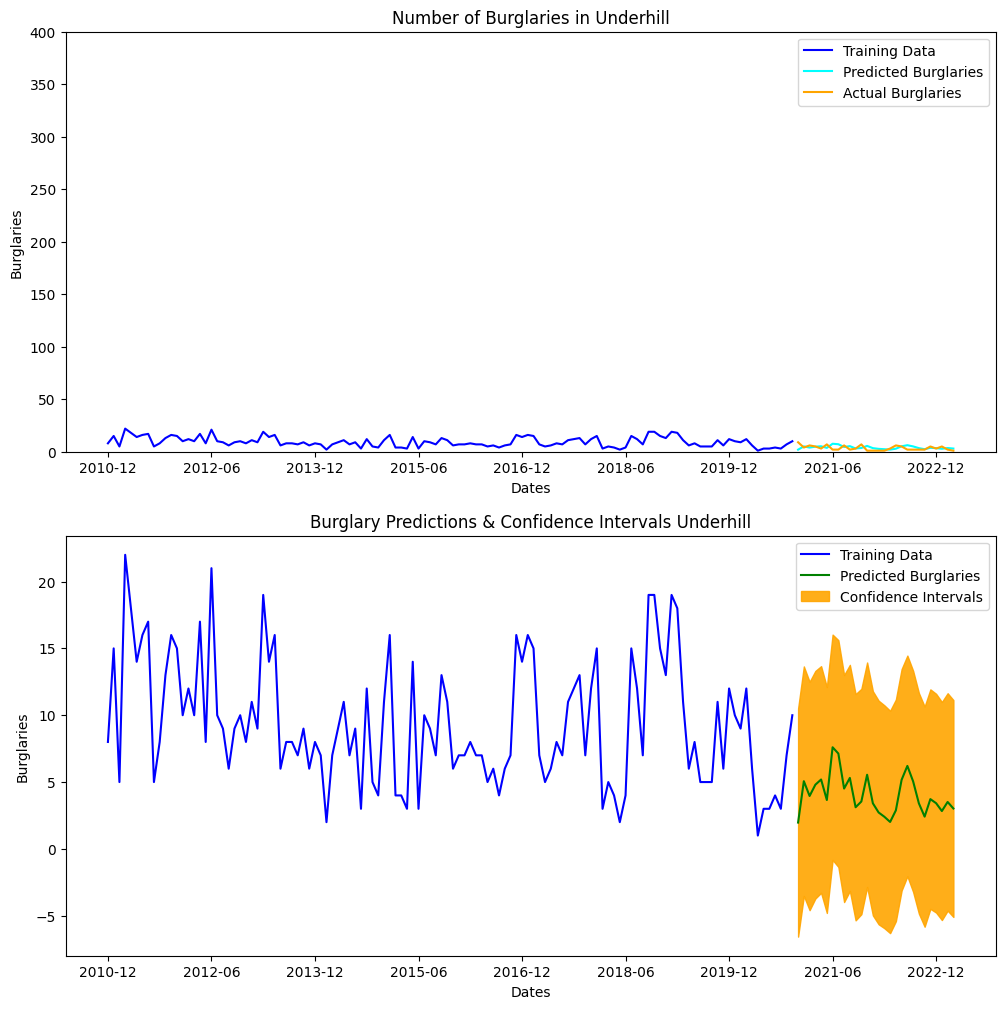

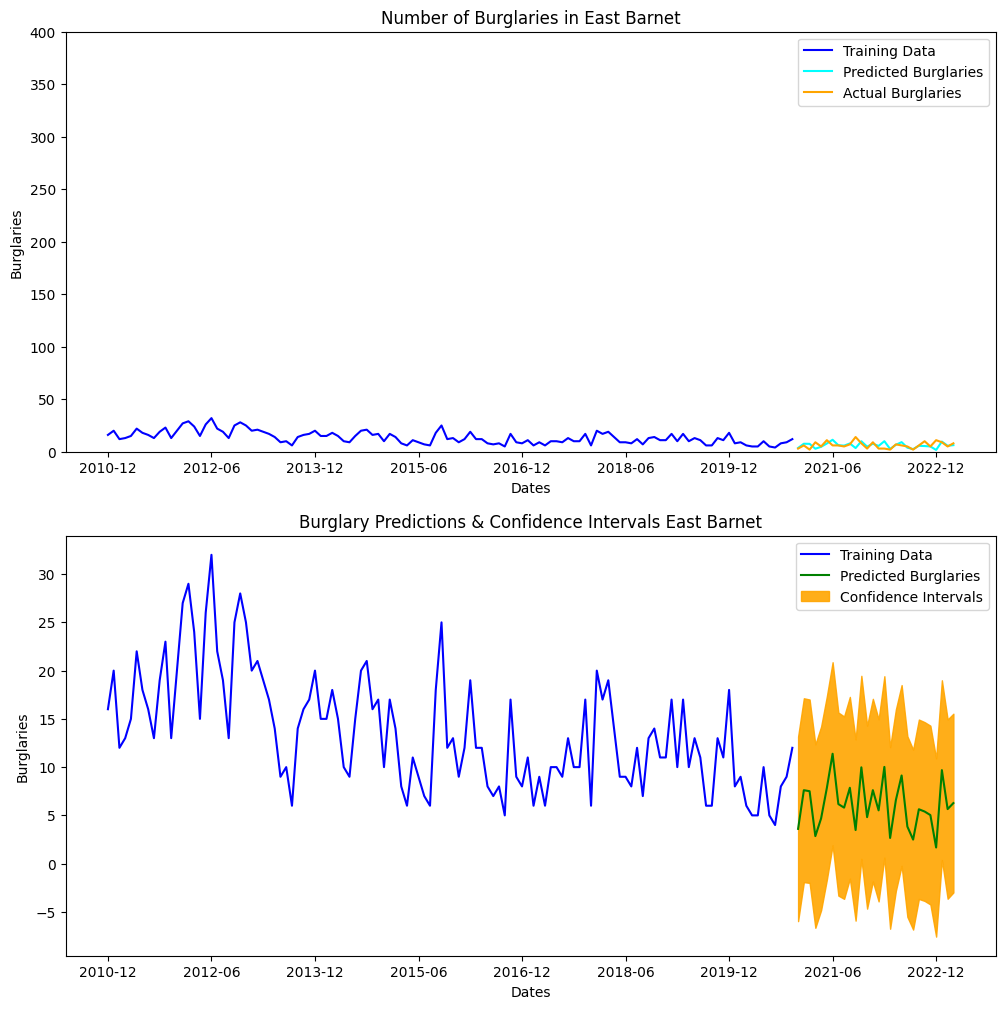

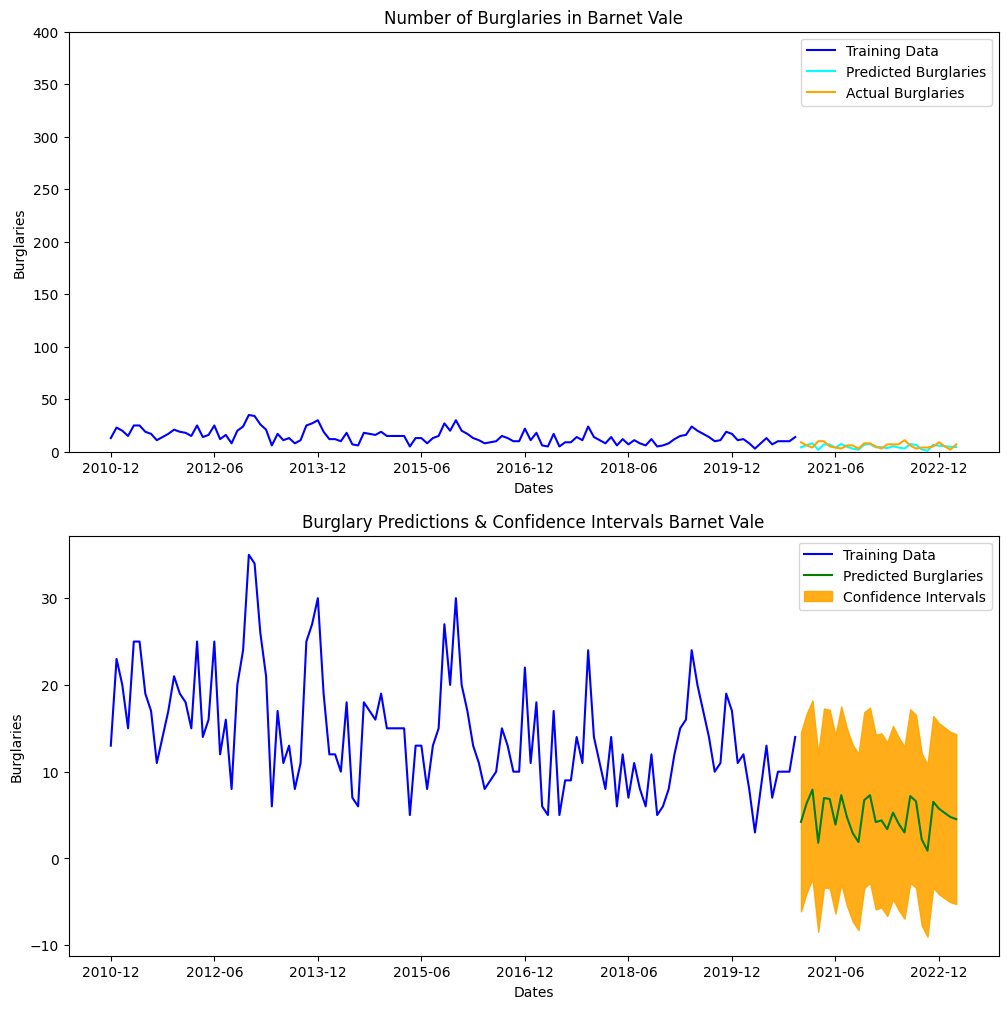

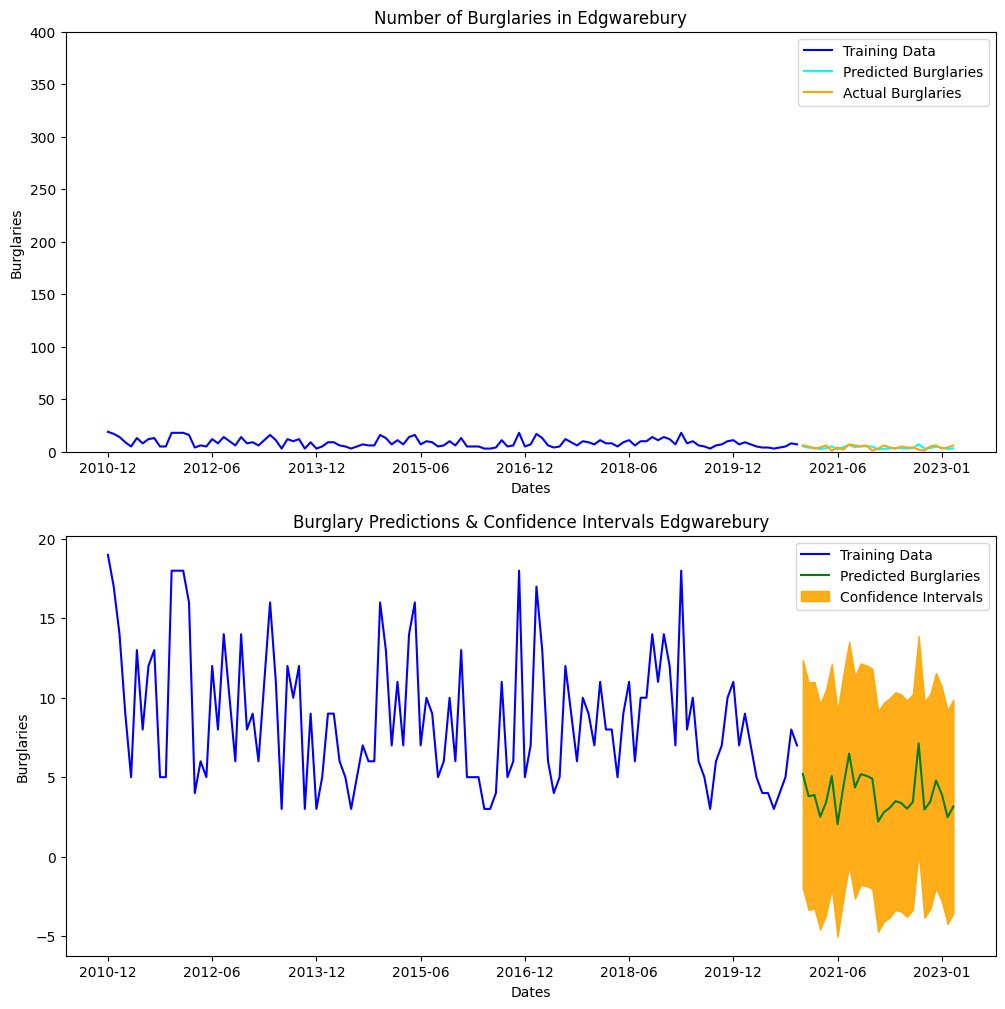

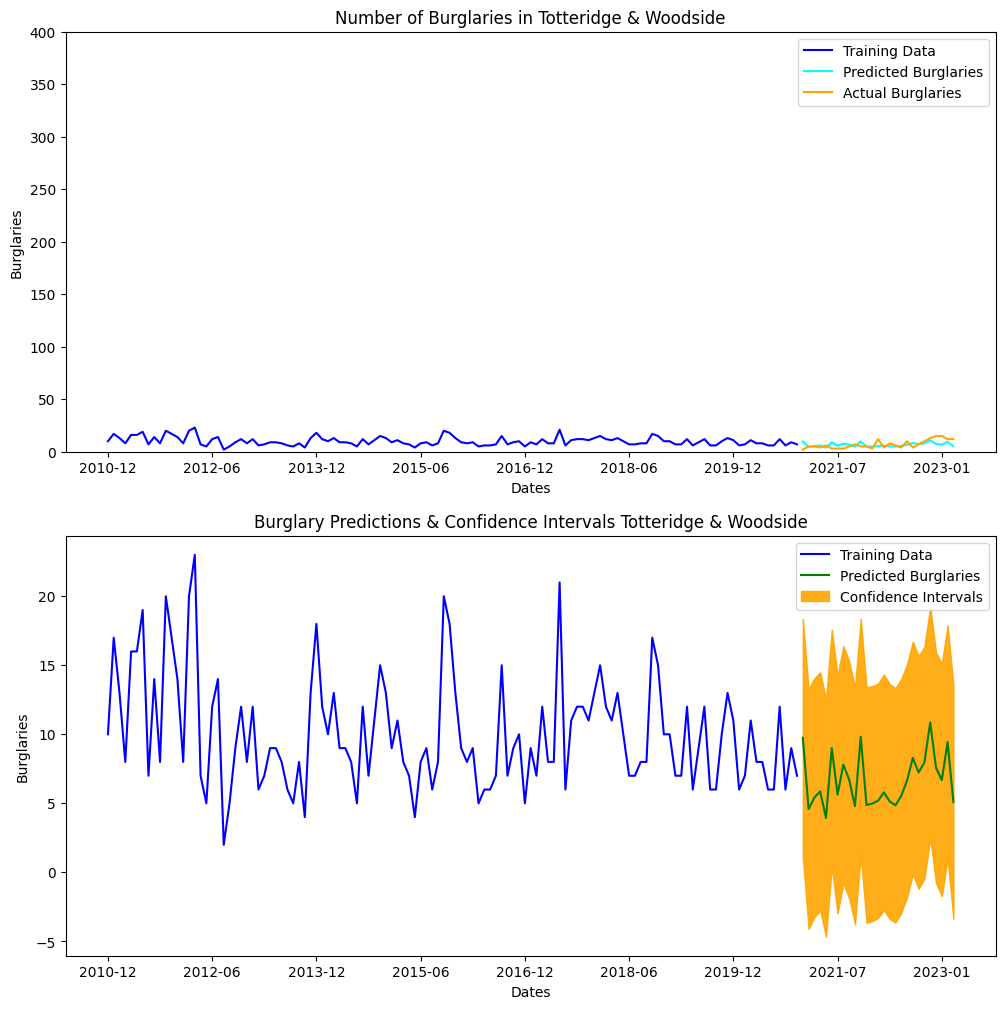

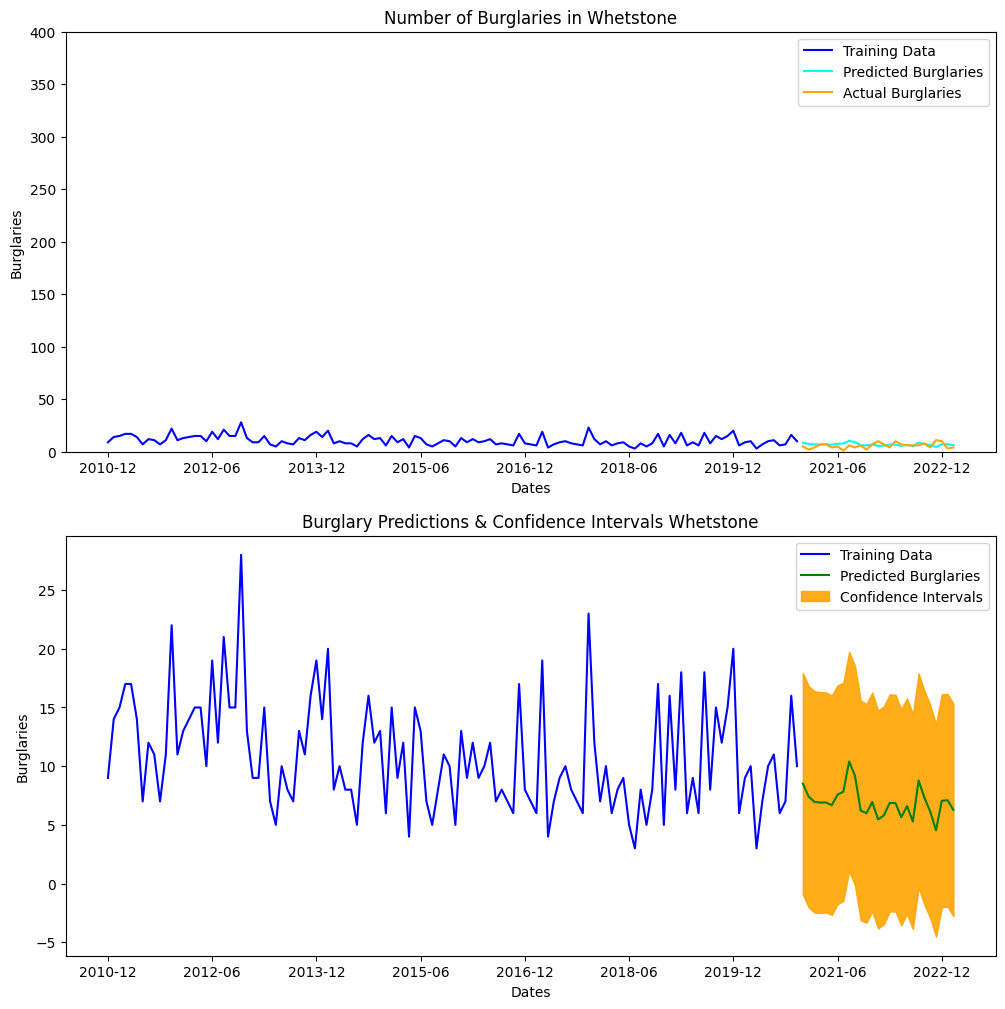

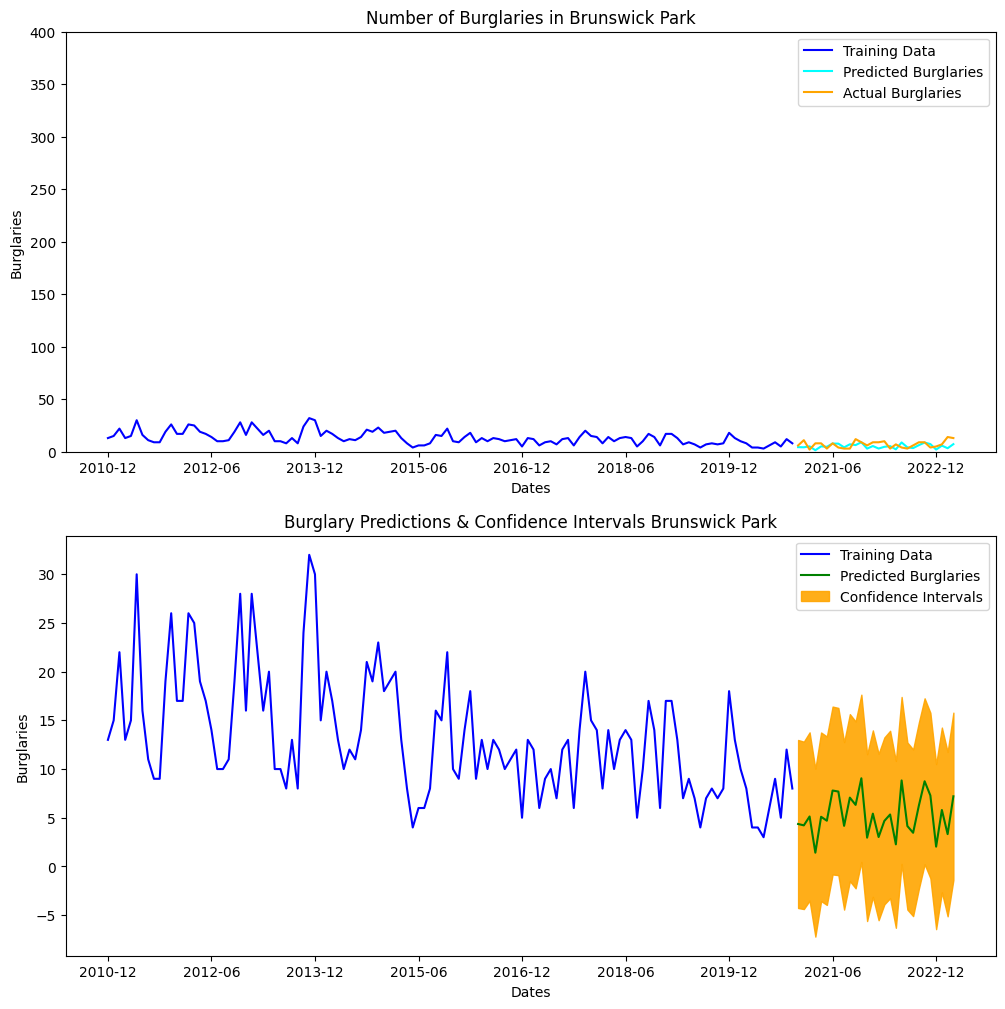

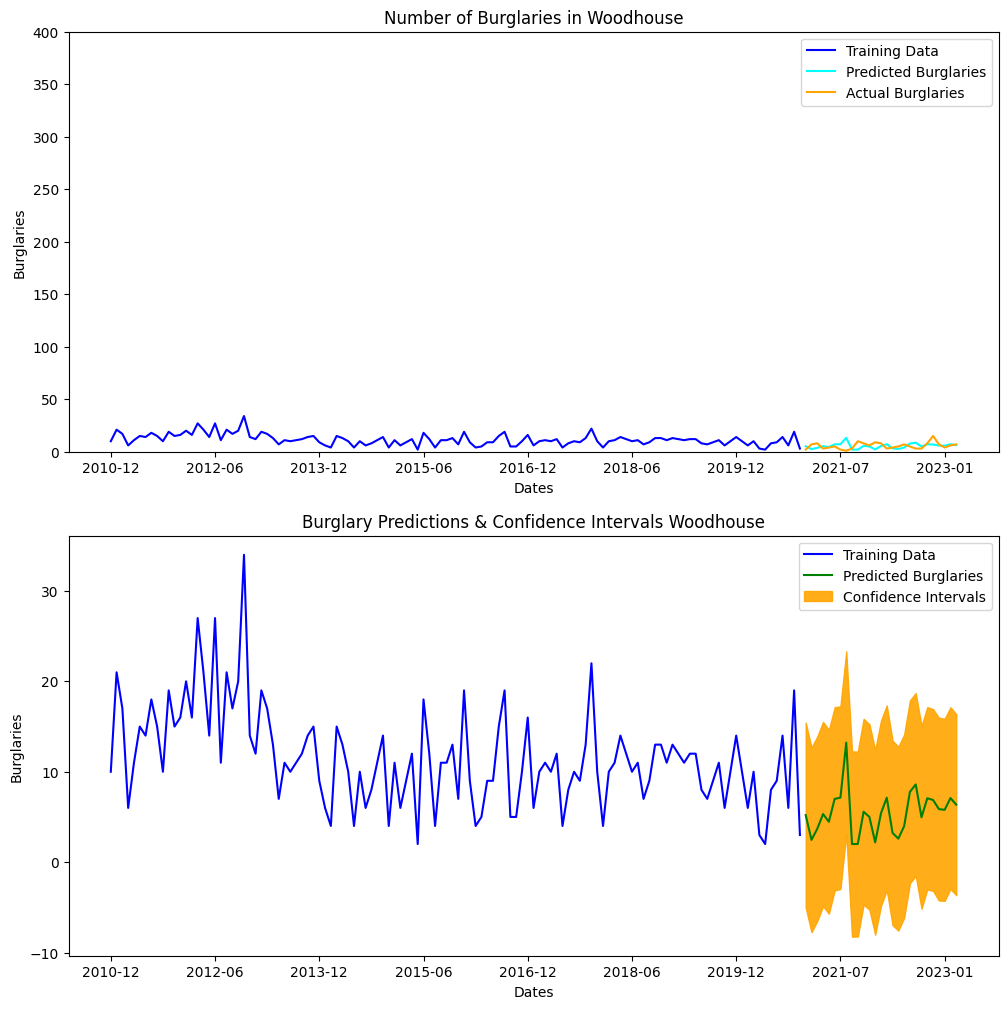

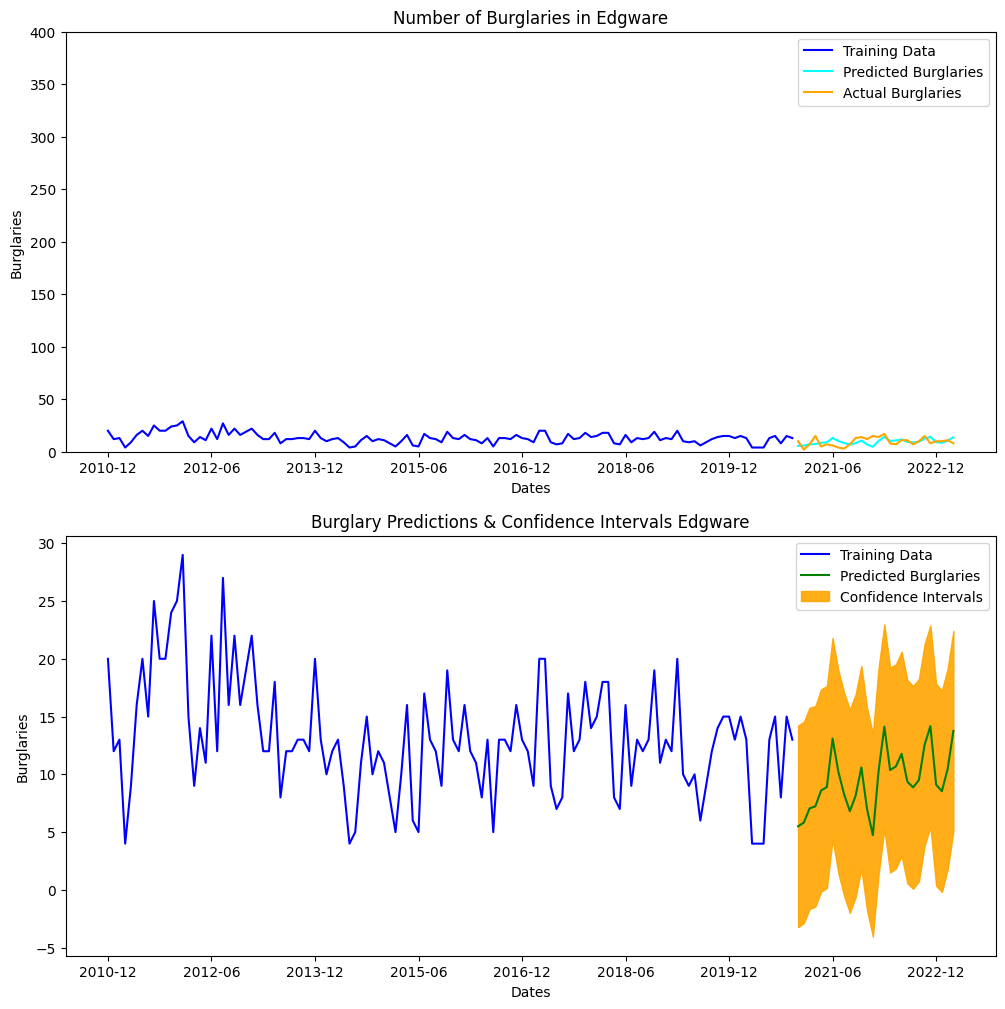

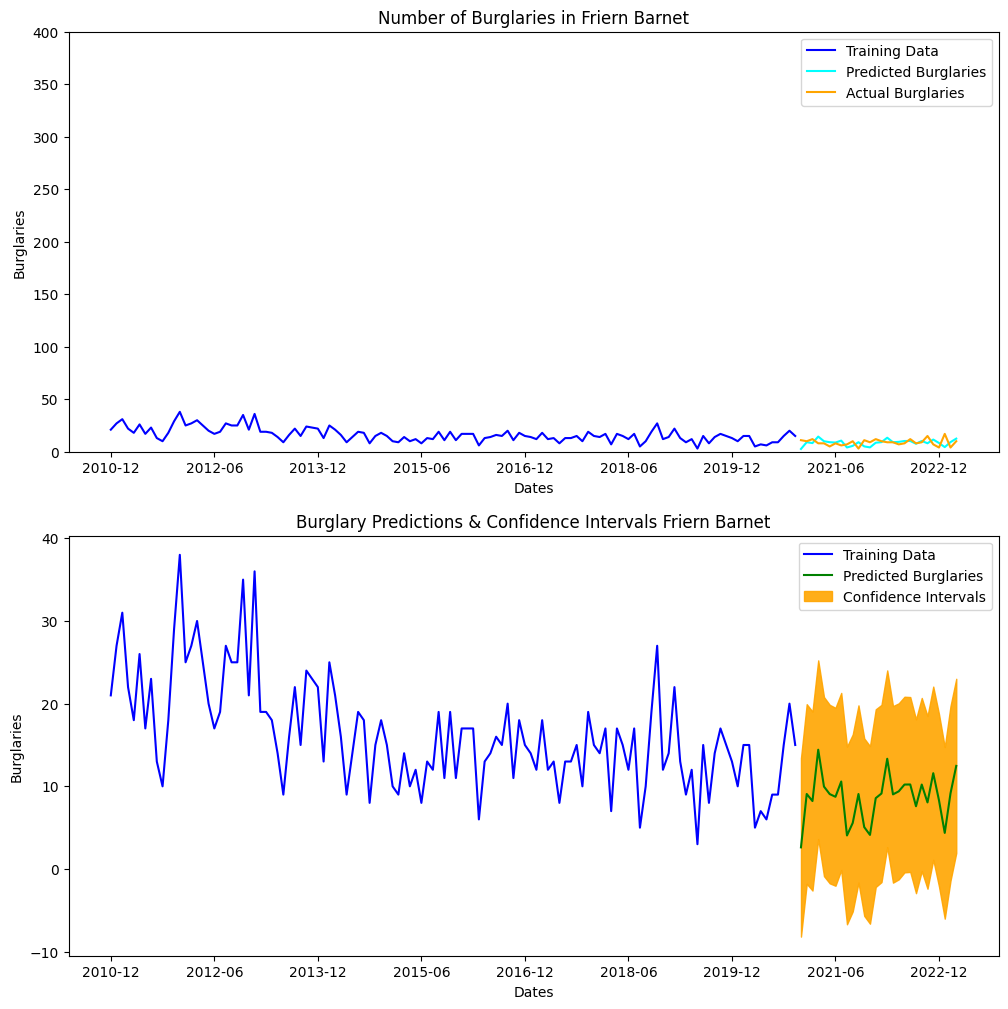

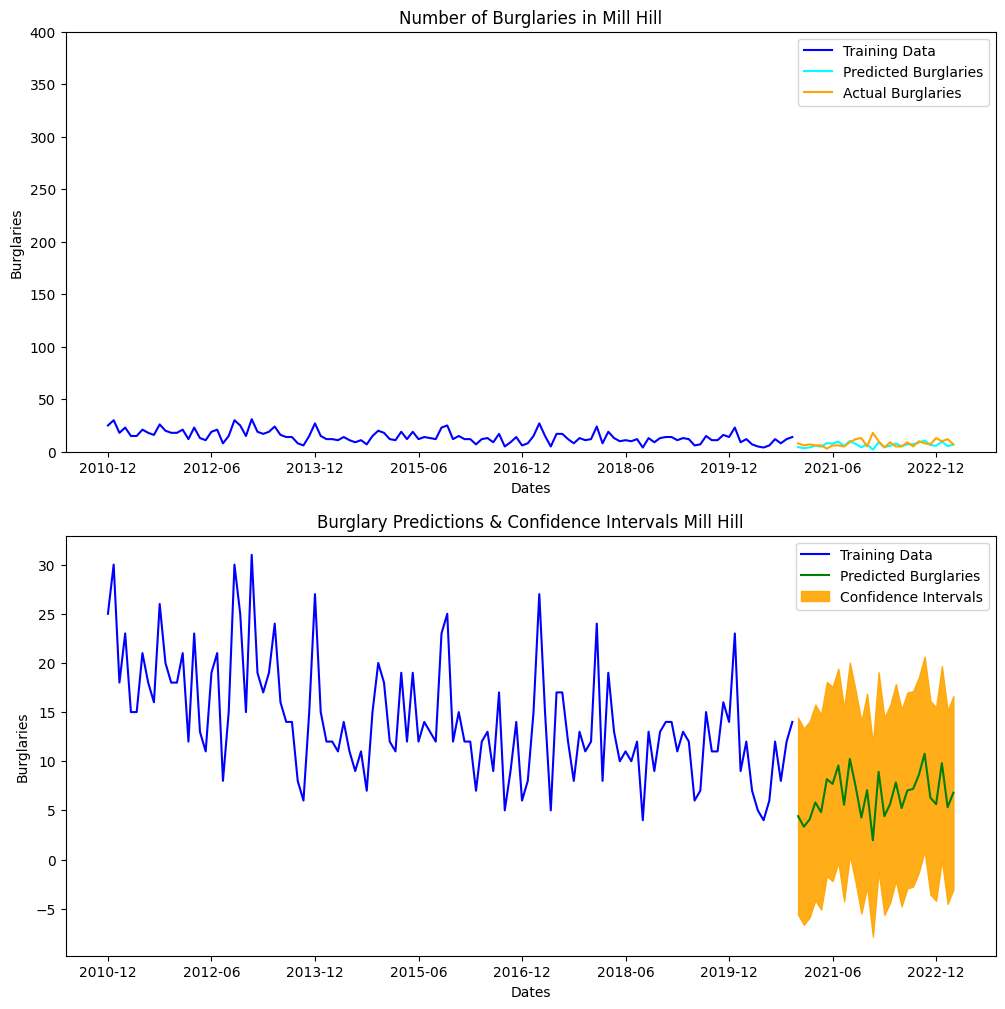

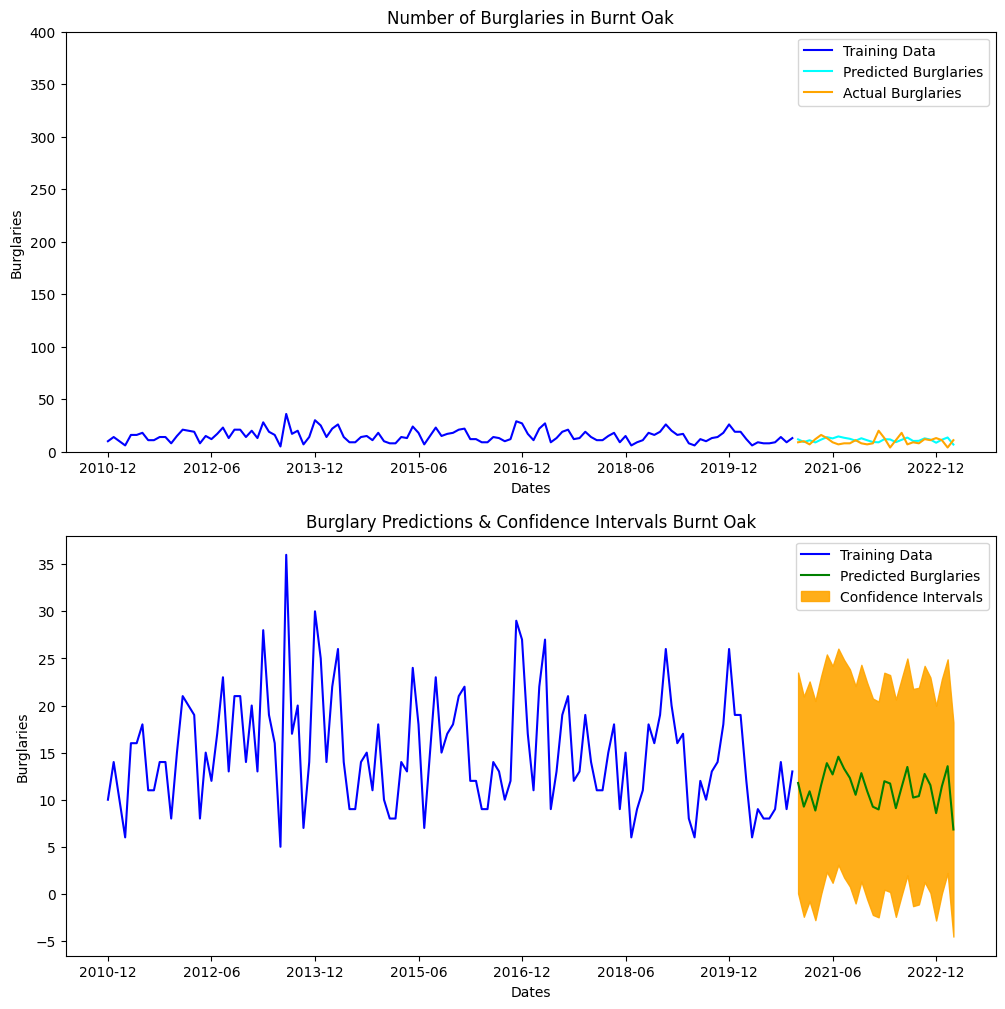

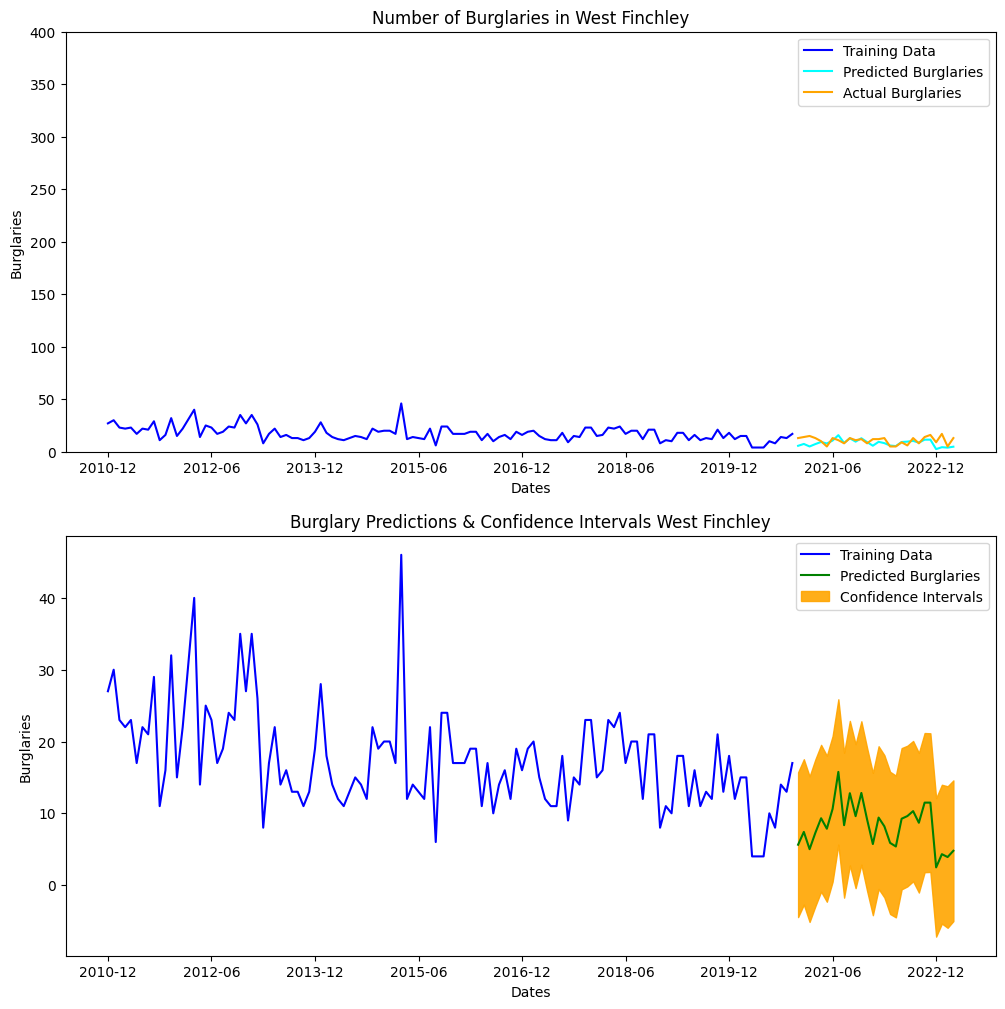

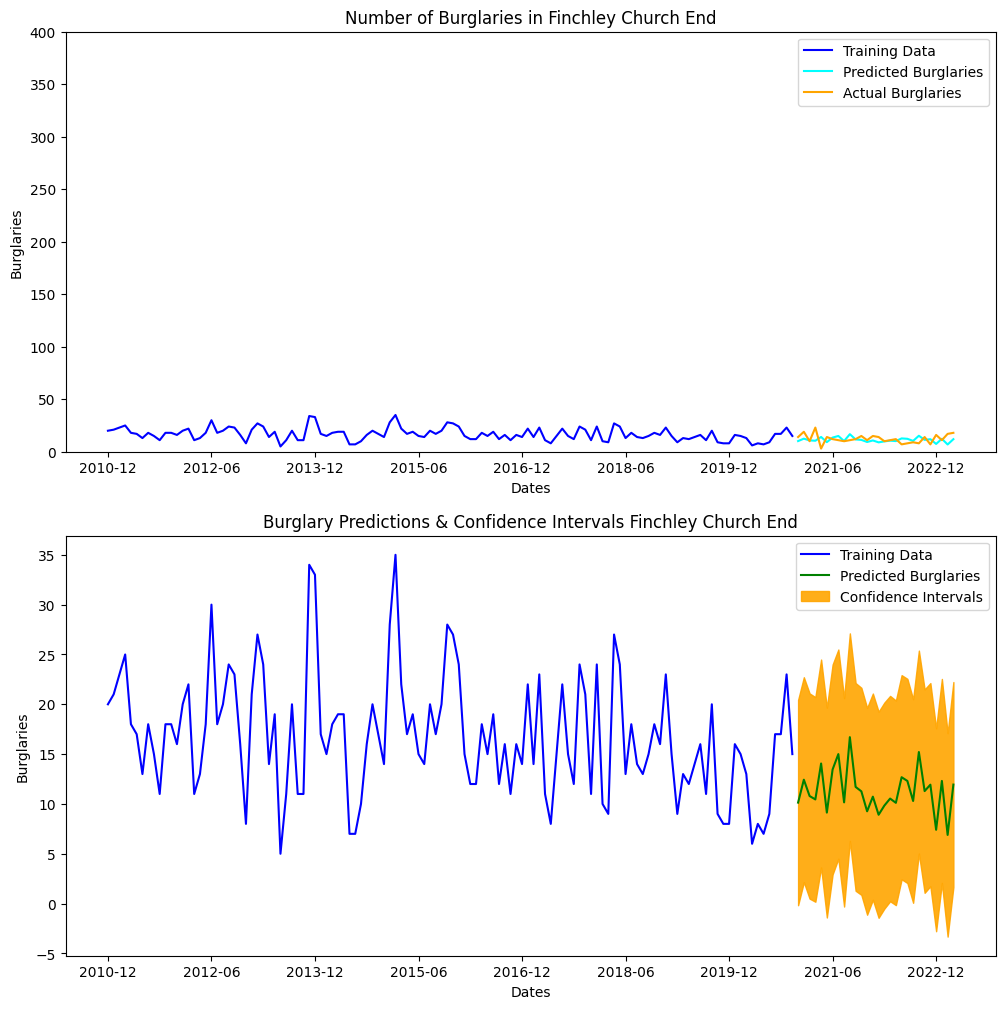

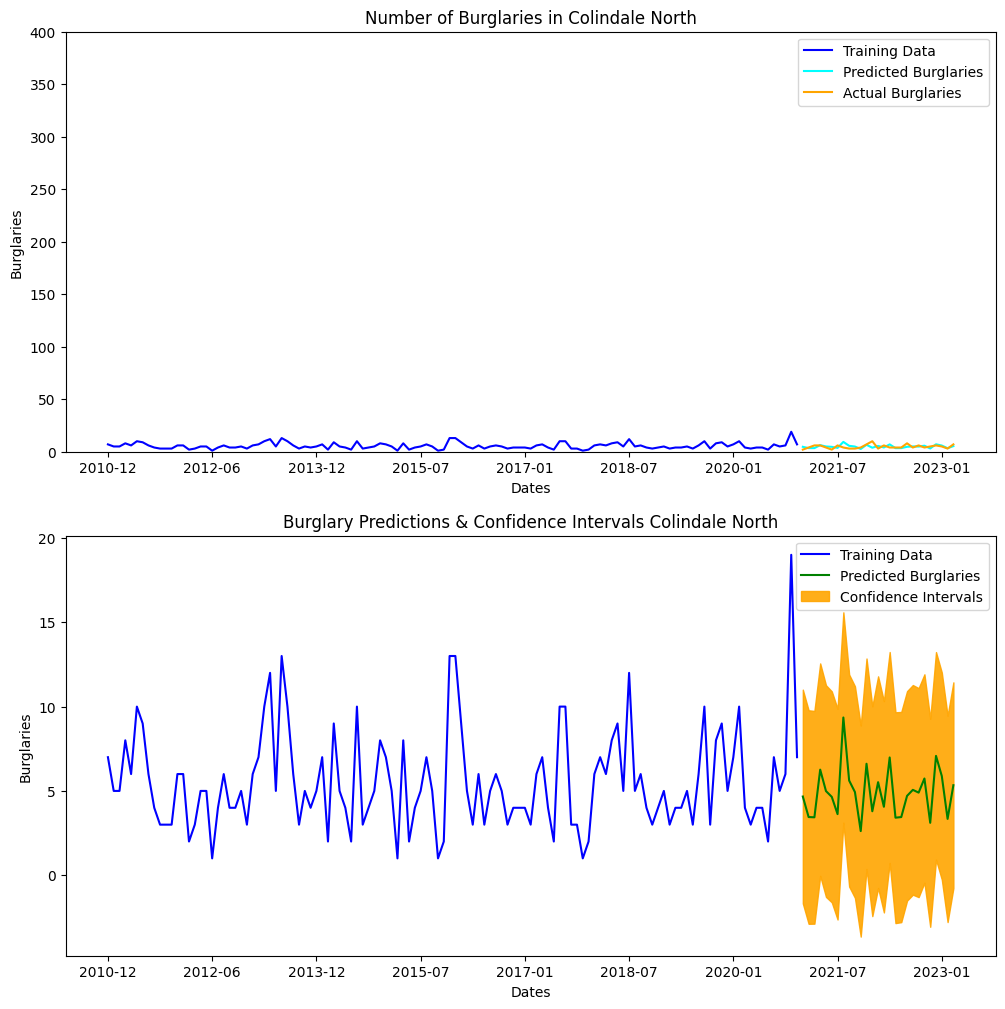

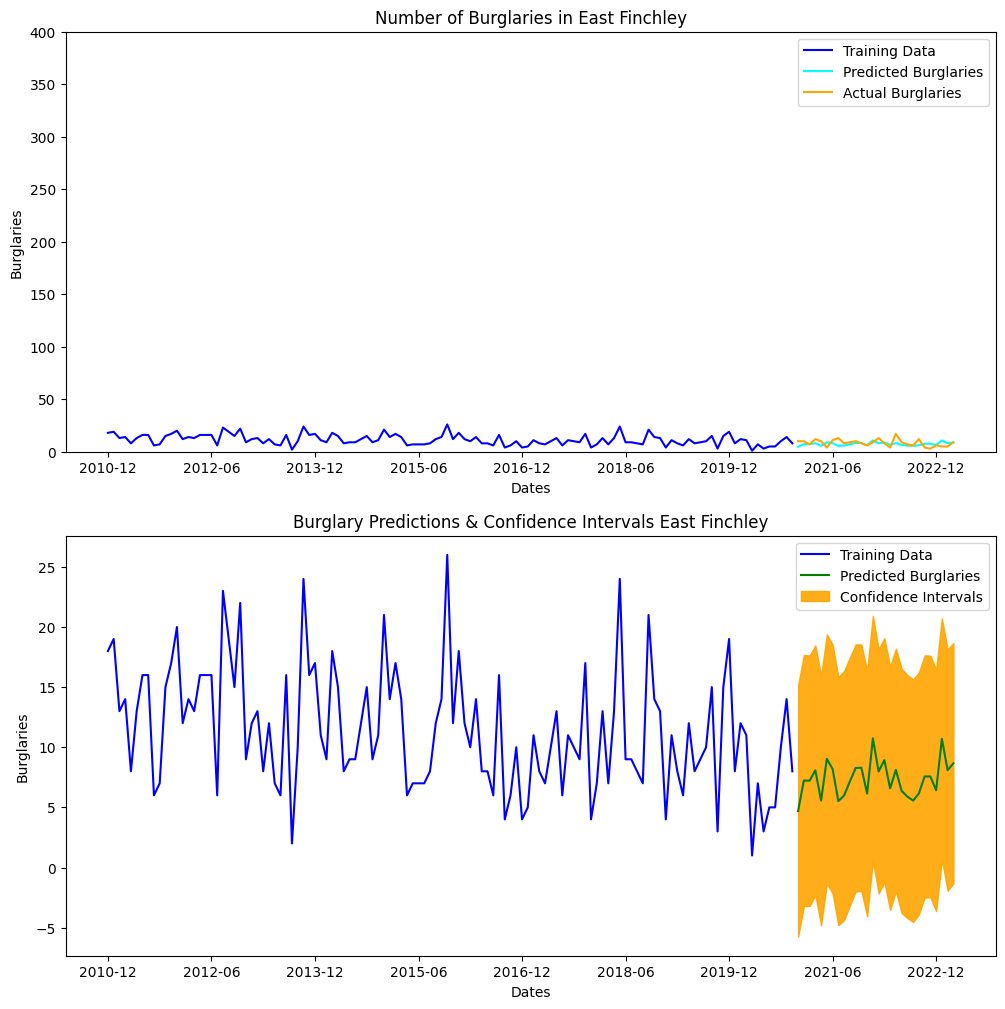

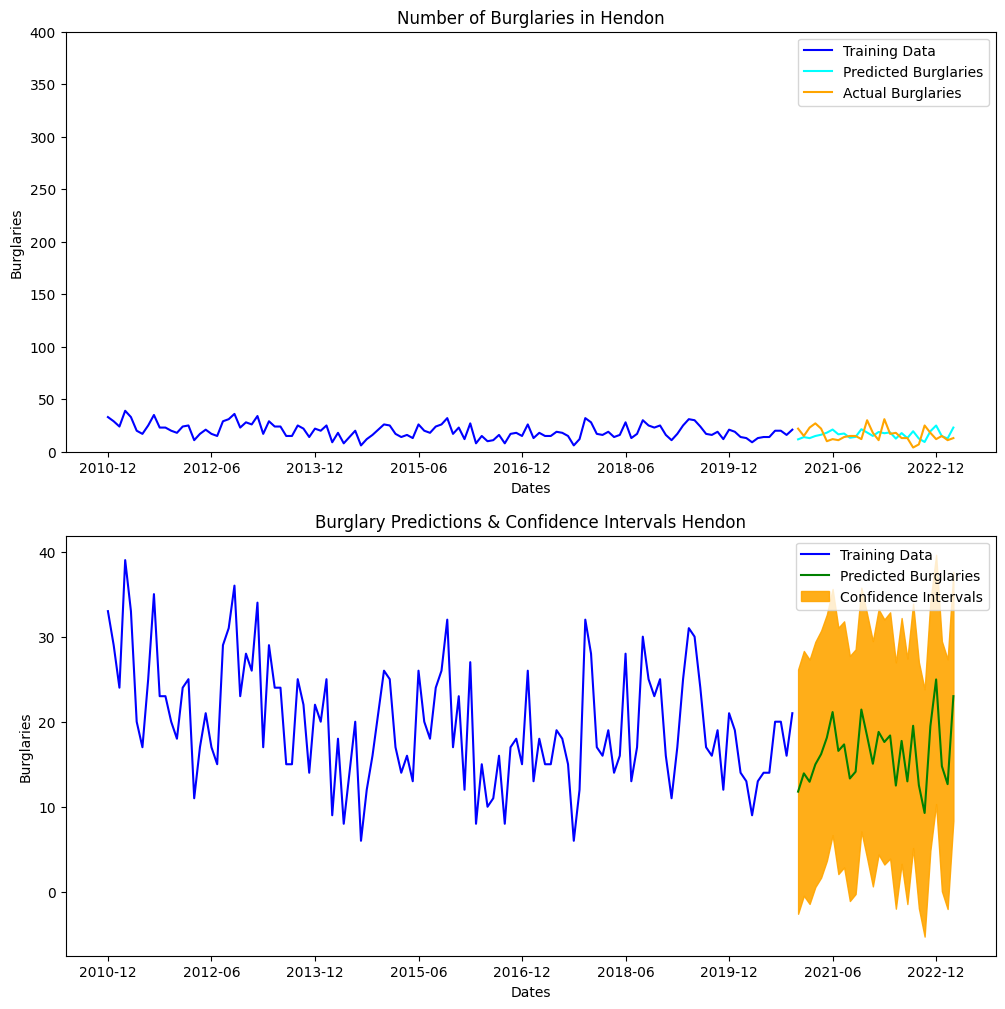

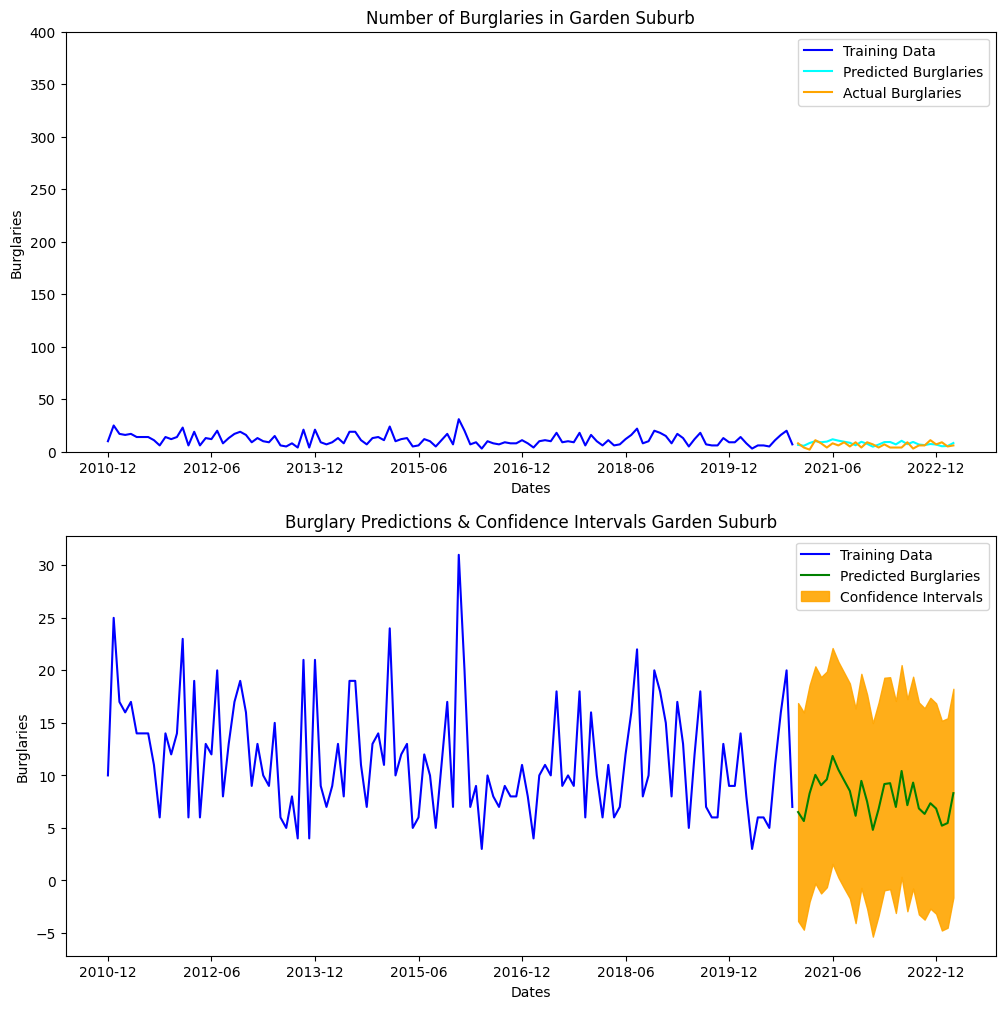

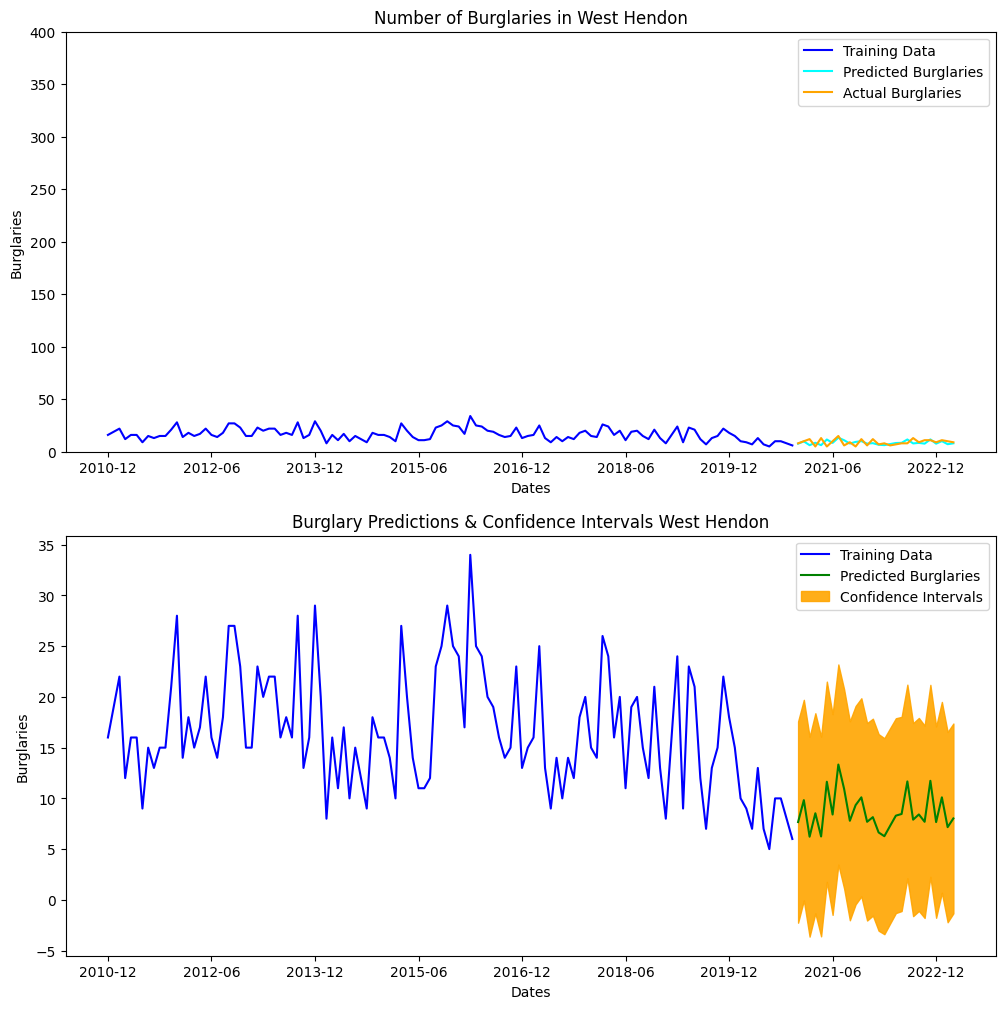

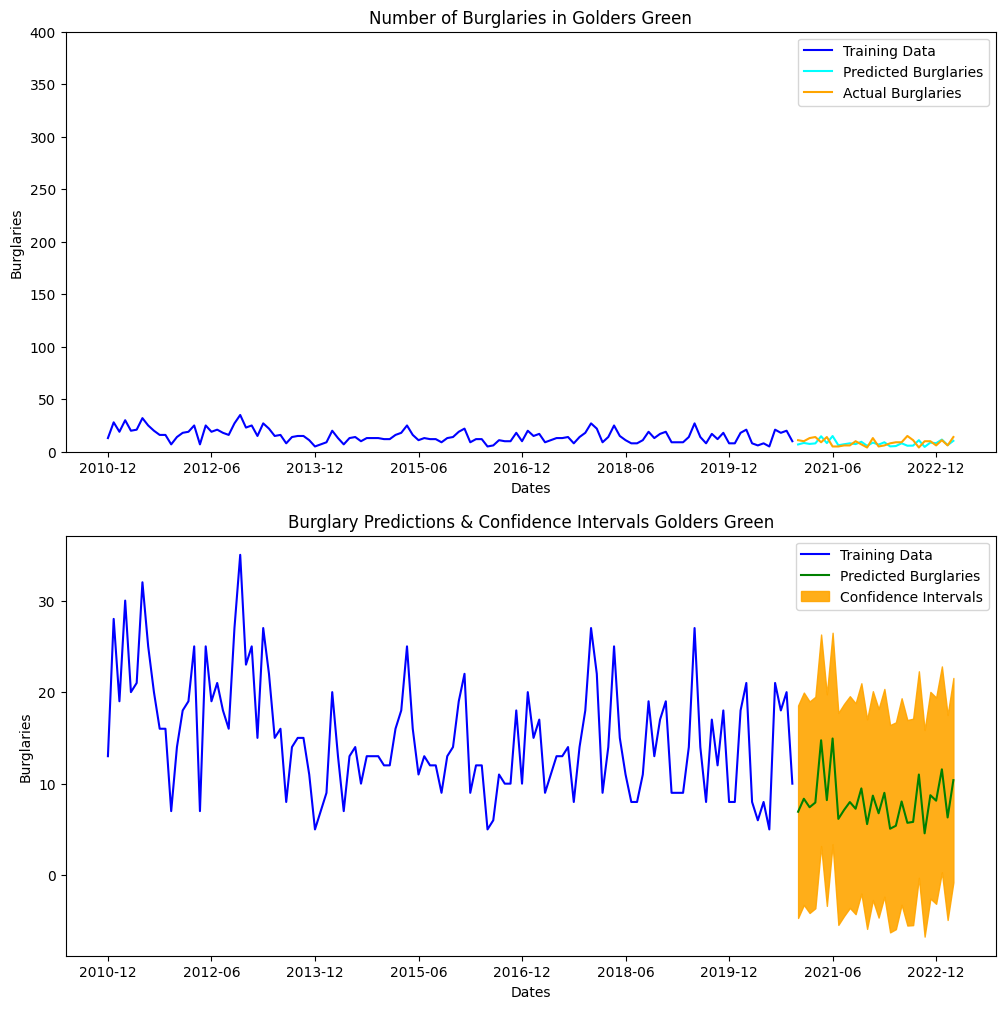

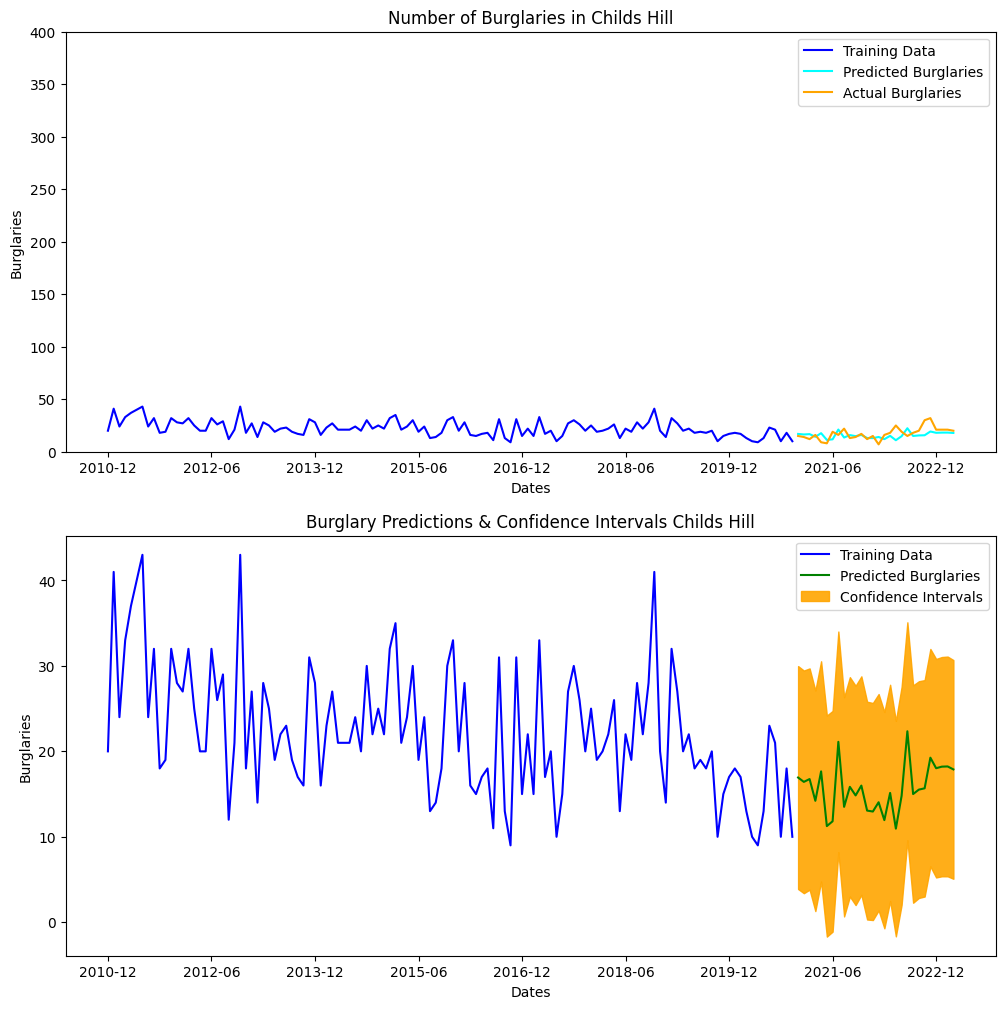

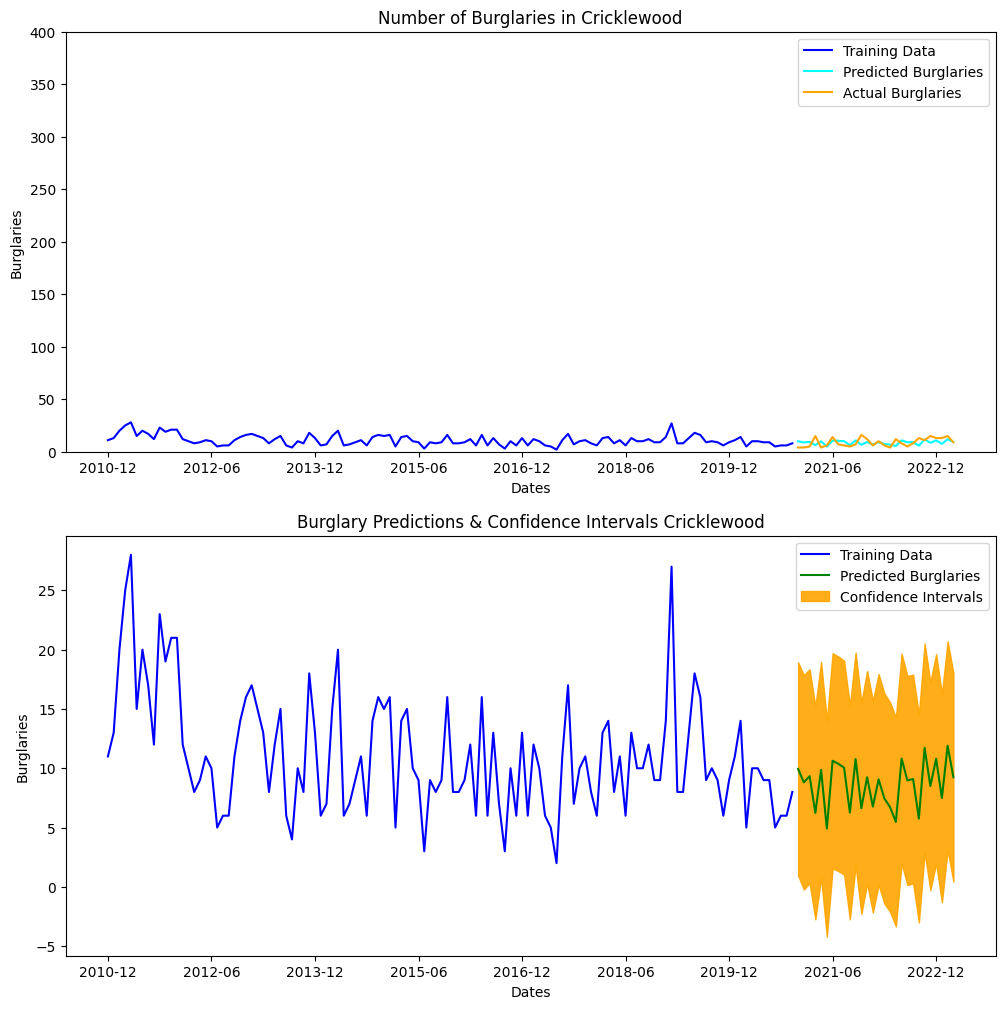

In [13]:
wards_list = ['High Barnet', 'Underhill', 'East Barnet', 'Barnet Vale',
       'Edgwarebury', 'Totteridge & Woodside', 'Whetstone',
       'Brunswick Park', 'Woodhouse', 'Edgware', 'Friern Barnet',
       'Mill Hill', 'Burnt Oak', 'West Finchley', 'Finchley Church End',
       'Colindale North', 'East Finchley', 'Hendon', 'Garden Suburb',
       'West Hendon', 'Golders Green', 'Childs Hill', 'Cricklewood']
predictions_dict = {}
for i in range(len(df_wards)):
# for i in range(1):
    predictions_dict[wards_list[i]] = predictions_func(df_wards[i], 120, wards_list[i])


In [14]:
MSE_list = []
SMAPE_list = []
for ward in predictions_dict:
    MSE_list.append(predictions_dict[ward][3]['MSE'])
    SMAPE_list.append(predictions_dict[ward][3]['SMAPE'])

np.mean(MSE_list), np.mean(SMAPE_list)

(18.925373634049187, 43.398782085720306)

In [15]:
df_forecast = predictions_dict['High Barnet'][6]
for i in range(1, len(df_wards)):
    df_forecast[wards_list[i]] = predictions_dict[wards_list[i]][6]

df_forecast = df_forecast.rename(columns={'prediction' : 'High Barnet'})
df_forecast['total'] = 0
for index, row in df_forecast.iterrows():
    df_forecast.loc[index, 'total'] = (sum(row))

df_forecast

High Barnet  Underhill  East Barnet  Barnet Vale  Edgwarebury   
month                                                                       
2023-04-01     7.502089   1.970533     3.602530     4.218363     5.200738  \
2023-05-01     4.972183   2.877217     7.865927     4.527483     3.558696   
2023-06-01     4.722936   2.358530     8.345455     7.358174     3.433695   
2023-07-01     3.601692   2.683722     5.805524     3.082286     2.612616   
2023-08-01     2.090437   3.359378     4.533724     4.307880     2.966929   
2023-09-01     8.064149   2.654901     7.649792     4.594548     4.097898   
2023-10-01     6.125777   5.576028    11.143860     3.708166     2.884469   
2023-11-01     5.549955   7.139041     9.199624     7.122818     4.041130   
2023-12-01     7.561329   6.039227     6.939607     6.232745     7.001099   
2024-01-01     5.318863   6.114002     8.608865     2.939590     4.289234   
2024-02-01     5.420246   4.810630     4.147271     0.646523     4.608164   
2024-03-01     2.201160   5.053578     8.271010     5.764211     4.927643   

            Totteridge & Woodside  Whetstone  Brunswick Park  Woodhouse   
month                                                                     
2023-04-01               9.741920   8.515600        4.358898   5.204478  \
2023-05-01               6.852470   7.399257        3.707899   2.918240   
2023-06-01               5.386431   6.994875        2.974275   3.430736   
2023-07-01               6.065495   6.950163        2.227868   4.524137   
2023-08-01               4.533961   6.959319        3.066532   4.096940   
2023-09-01               8.494157   6.714641        3.607315   6.783401   
2023-10-01               7.339532   7.606093        8.048934   6.968665   
2023-11-01               8.746986   7.905220        7.396055  13.963294   
2023-12-01               8.405027  10.661988        4.991595   4.357466   
2024-01-01               5.636833   9.238139        7.235731   3.916421   
2024-02-01               9.016354   6.490316        7.369363   6.350100   
2024-03-01               6.468280   6.223864        7.122746   5.685655   

              Edgware  ...  Finchley Church End  Colindale North   
month                  ...                                         
2023-04-01   5.497707  ...            10.134540         4.668169  \
2023-05-01   4.976606  ...            11.379070         4.094570   
2023-06-01   6.971688  ...             8.869122         3.449129   
2023-07-01   7.187040  ...            10.411234         5.673068   
2023-08-01   7.148562  ...            10.468348         4.880681   
2023-09-01   8.227319  ...            11.015519         4.846292   
2023-10-01  12.751589  ...            12.191528         4.299304   
2023-11-01  11.189490  ...            14.816934         8.816459   
2023-12-01  10.364703  ...            10.599999         6.580087   
2024-01-01   9.823058  ...            16.410535         5.555602   
2024-02-01  10.883877  ...            12.588144         3.293102   
2024-03-01  12.257933  ...            10.989995         6.419918   

            East Finchley     Hendon  Garden Suburb  West Hendon   
month                                                              
2023-04-01       4.687821  11.779922       6.511973     7.668875  \
2023-05-01       7.211274  11.819358       5.635037     9.729943   
2023-06-01       7.069933  11.019173       8.261391     6.129671   
2023-07-01       7.957948  11.270654      10.180250     6.686140   
2023-08-01       5.420568  10.467584       9.141741     6.404445   
2023-09-01       8.891057  12.269607       9.612224     8.678628   
2023-10-01       8.199470  18.915516      11.984018     8.518691   
2023-11-01       5.396959  17.158390      10.626342    11.621766   
2023-12-01       5.867449  18.881168       9.687773     9.436717   
2024-01-01       6.945082  15.267675       8.667027     7.903192   
2024-02-01       7.942209  14.924026       6.389383     8.209735   
2024-03-01       8.145445  21.537426       9.

In [16]:
df_density = df_forecast.copy()
for i in range(len(wards_list)):
    df_density[wards_list[i]] = df_forecast[wards_list[i]]/df_forecast['total']

df_density

High Barnet  Underhill  East Barnet  Barnet Vale  Edgwarebury   
month                                                                       
2023-04-01     0.047032   0.012354     0.022585     0.026446     0.032605  \
2023-05-01     0.031369   0.018152     0.049625     0.028563     0.022451   
2023-06-01     0.030914   0.015438     0.054625     0.048162     0.022475   
2023-07-01     0.023065   0.017186     0.037178     0.019738     0.016731   
2023-08-01     0.013225   0.021254     0.028683     0.027254     0.018771   
2023-09-01     0.044696   0.014715     0.042400     0.025466     0.022713   
2023-10-01     0.028857   0.026268     0.052497     0.017468     0.013588   
2023-11-01     0.022749   0.029263     0.037709     0.029196     0.016564   
2023-12-01     0.037376   0.029852     0.034303     0.030809     0.034607   
2024-01-01     0.026107   0.030009     0.042255     0.014428     0.021053   
2024-02-01     0.029206   0.025922     0.022347     0.003484     0.024831   
2024-03-01     0.010751   0.024682     0.040396     0.028153     0.024067   

            Totteridge & Woodside  Whetstone  Brunswick Park  Woodhouse   
month                                                                     
2023-04-01               0.061074   0.053386        0.027327   0.032628  \
2023-05-01               0.043231   0.046681        0.023392   0.018411   
2023-06-01               0.035257   0.045785        0.019468   0.022456   
2023-07-01               0.038842   0.044508        0.014267   0.028972   
2023-08-01               0.028685   0.044029        0.019401   0.025920   
2023-09-01               0.047080   0.037217        0.019994   0.037598   
2023-10-01               0.034575   0.035831        0.037917   0.032828   
2023-11-01               0.035854   0.032403        0.030316   0.057235   
2023-12-01               0.041546   0.052703        0.024674   0.021539   
2024-01-01               0.027667   0.045344        0.035515   0.019223   
2024-02-01               0.048584   0.034972        0.039709   0.034217   
2024-03-01               0.031591   0.030398        0.034788   0.027769   

             Edgware  ...  Finchley Church End  Colindale North   
month                 ...                                         
2023-04-01  0.034466  ...             0.063536         0.029266  \
2023-05-01  0.031396  ...             0.071788         0.025832   
2023-06-01  0.045633  ...             0.058052         0.022576   
2023-07-01  0.046025  ...             0.066672         0.036329   
2023-08-01  0.045226  ...             0.066229         0.030878   
2023-09-01  0.045601  ...             0.061055         0.026861   
2023-10-01  0.060070  ...             0.057432         0.020253   
2023-11-01  0.045865  ...             0.060734         0.036138   
2023-12-01  0.051233  ...             0.052396         0.032526   
2024-01-01  0.048215  ...             0.080548         0.027269   
2024-02-01  0.058647  ...             0.067830         0.017745   
2024-03-01  0.059868  ...             0.053676         0.031355   

            East Finchley    Hendon  Garden Suburb  West Hendon   
month                                                             
2023-04-01       0.029389  0.073851       0.040825     0.048078  \
2023-05-01       0.045495  0.074566       0.035550     0.061384   
2023-06-01       0.046276  0.072125       0.054074     0.040121   
2023-07-01       0.050961  0.072175       0.065193     0.042817   
2023-08-01       0.034294  0.066225       0.057837     0.040519   
2023-09-01       0.049280  0.068006       0.053277     0.048102   
2023-10-01       0.038626  0.089107       0.056454     0.040130   
2023-11-01       0.022122  0.070332       0.043557     0.047637   
2023-12-01       0.029003  0.093330       0.047887     0.046646   
2024-01-01       0.034089  0.074938       0.042540     0.038791   
2024-02-01       0.042796  0.080417       0.034429     0.044237   
2024-03-01       0.039783  0.105190       0.047216     0.052481   

    

Text(0, 0.5, 'Burglaries')

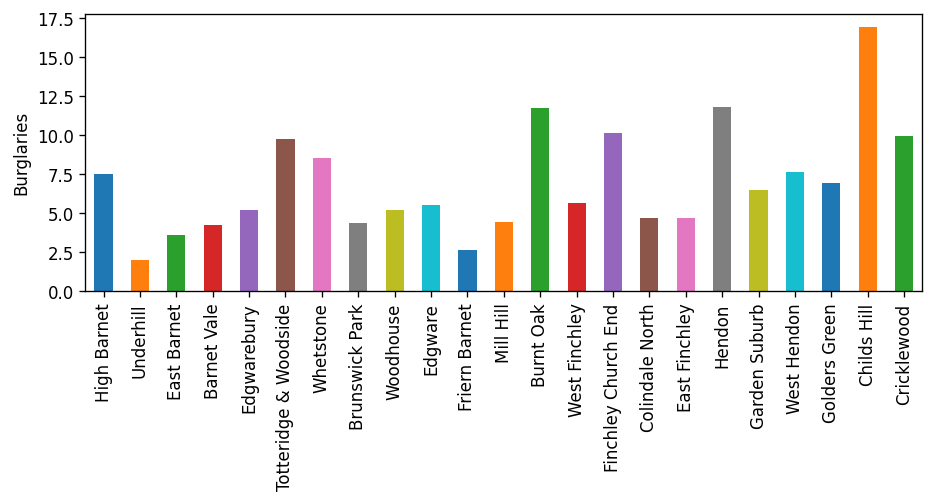

In [501]:
import matplotlib.colors as mcolors
df_forecast_no_total = df_forecast.drop(columns='total')
df_forecast_no_total.loc['2023-04-01'].plot.bar(color=mcolors.TABLEAU_COLORS)
plt.ylabel('Burglaries')

<Axes: xlabel='month'>

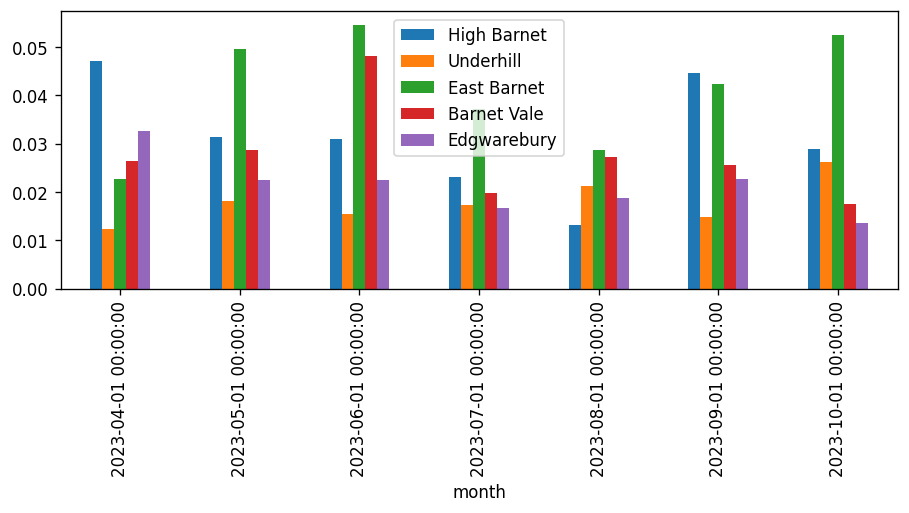

In [541]:
new_df = df_density_no_total.loc['2023-04-01':'2023-10-01', 'High Barnet':'Edgwarebury']
pd.concat(
    [new_df.loc[:, 'High Barnet'], new_df.loc[:, 'Underhill'], new_df.loc[:, 'East Barnet'], new_df.loc[:, 'Barnet Vale'], new_df.loc[:, 'Edgwarebury']],
    axis=1).plot.bar()


In [558]:
new_df = df_forecast_no_total.loc['2023-04-01':'2023-08-01', 'High Barnet':'Whetstone']
new_df.index = new_df.index.to_period('M')
new_df

High Barnet  Underhill  East Barnet  Barnet Vale  Edgwarebury   
month                                                                    
2023-04     7.502089   1.970533     3.602530     4.218363     5.200738  \
2023-05     4.972183   2.877217     7.865927     4.527483     3.558696   
2023-06     4.722936   2.358530     8.345455     7.358174     3.433695   
2023-07     3.601692   2.683722     5.805524     3.082286     2.612616   
2023-08     2.090437   3.359378     4.533724     4.307880     2.966929   

         Totteridge & Woodside  Whetstone  
month                                      
2023-04               9.741920   8.515600  
2023-05               6.852470   7.399257  
2023-06               5.386431   6.994875  
2023-07               6.065495   6.950163  
2023-08               4.533961   6.959319

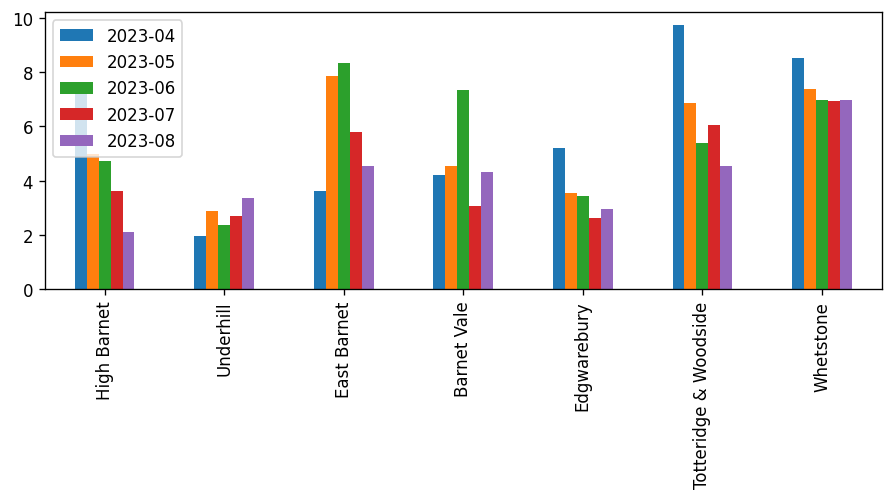

In [570]:
# new_df = df_density_no_total.loc['2023-04-01':'2023-08-01', 'High Barnet':'Edgwarebury']
pd.concat(
    [new_df.loc['2023-04',:], new_df.loc['2023-05',:], new_df.loc['2023-06',:], new_df.loc['2023-07', :], new_df.loc['2023-08', :]],
    axis=1).plot.bar()
# plt.ylim([0,15])
plt.legend(loc='upper left')

In [510]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
df
# ax = df.plot.bar(rot=0)

speed  lifespan
snail       0.1       2.0
pig        17.5       8.0
elephant   40.0      70.0
rabbit     48.0       1.5
giraffe    52.0      25.0
coyote     69.0      12.0
horse      88.0      28.0

In [294]:
forecast_df = pd.read_csv('forecast_df.csv')
forecast_df

month  High Barnet  Underhill  East Barnet  Barnet Vale  Edgwarebury   
0   2023-04-01     7.502089   1.970533     3.602530     4.218363     5.200738  \
1   2023-05-01     4.972183   2.877217     7.865927     4.527483     3.558696   
2   2023-06-01     4.722936   2.358530     8.345455     7.358174     3.433695   
3   2023-07-01     3.601692   2.683722     5.805524     3.082286     2.612616   
4   2023-08-01     2.090437   3.359378     4.533724     4.307880     2.966929   
5   2023-09-01     8.064149   2.654901     7.649792     4.594548     4.097898   
6   2023-10-01     6.125777   5.576028    11.143860     3.708166     2.884469   
7   2023-11-01     5.549955   7.139041     9.199624     7.122818     4.041130   
8   2023-12-01     7.561329   6.039227     6.939607     6.232745     7.001099   
9   2024-01-01     5.318863   6.114002     8.608865     2.939590     4.289234   
10  2024-02-01     5.420246   4.810630     4.147271     0.646523     4.608164   
11  2024-03-01     2.201160   5.053578     8.271010     5.764211     4.927643   

    Totteridge & Woodside  Whetstone  Brunswick Park  Woodhouse  ...   
0                9.741920   8.515600        4.358898   5.204478  ...  \
1                6.852470   7.399257        3.707899   2.918240  ...   
2                5.386431   6.994875        2.974275   3.430736  ...   
3                6.065495   6.950163        2.227868   4.524137  ...   
4                4.533961   6.959319        3.066532   4.096940  ...   
5                8.494157   6.714641        3.607315   6.783401  ...   
6                7.339532   7.606093        8.048934   6.968665  ...   
7                8.746986   7.905220        7.396055  13.963294  ...   
8                8.405027  10.661988        4.991595   4.357466  ...   
9                5.636833   9.238139        7.235731   3.916421  ...   
10               9.016354   6.490316        7.369363   6.350100  ...   
11               6.468280   6.223864        7.122746   5.685655  ...   

    Finchley Church End  Colindale North  East Finchley     Hendon   
0             10.134540         4.668169       4.687821  11.779922  \
1             11.379070         4.094570       7.211274  11.819358   
2              8.869122         3.449129       7.069933  11.019173   
3             10.411234         5.673068       7.957948  11.270654   
4             10.468348         4.880681       5.420568  10.467584   
5             11.015519         4.846292       8.891057  12.269607   
6             12.191528         4.299304       8.199470  18.915516   
7             14.816934         8.816459       5.396959  17.158390   
8             10.599999         6.580087       5.867449  18.881168   
9             16.410535         5.555602       6.945082  15.267675   
10            12.588144         3.293102       7.942209  14.924026   
11            10.989995         6.419918       8.145445  21.537426   

    Garden Suburb  West Hendon  Golders Green  Childs Hill  Cricklewood   
0        6.511973     7.668875       6.933829    16.936576     9.941735  \
1        5.635037     9.729943       6.897528    16.759155    10.576013   
2        8.261391     6.129671       6.473238    17.461849    11.140602   
3       10.180250     6.686140       5.399425    15.789314     9.586092   
4        9.141741     6.404445      11.829619    18.819642     9.237686   
5        9.612224     8.678628       8.384323    13.715545     9.147907   
6       11.984018     8.518691      11.922268    14.556741    10.672386   
7       10.626342    11.621766       7.358853    22.422698    12.983191   
8        9.687773     9.436717       5.231374    15.514650    11.418028   
9        8.667027     7.903192       8.839822    16.326016     9.930032   
10       6.389383     8.209735       6.491792    15.768756    12.997652   
11       9.667338    10.745439       9.791805    16.994575    11.017400   

         total  
0   159.509402  
1   158.508388  
2   152.778165  
3   156.156435  
4   158.061722  
5   180.420774  
6   212.2777

In [252]:
df_forecast.columns

Index(['High Barnet', 'Underhill', 'East Barnet', 'Barnet Vale', 'Edgwarebury',
       'Totteridge & Woodside', 'Whetstone', 'Brunswick Park', 'Woodhouse',
       'Edgware', 'Friern Barnet', 'Mill Hill', 'Burnt Oak', 'West Finchley',
       'Finchley Church End', 'Colindale North', 'East Finchley', 'Hendon',
       'Garden Suburb', 'West Hendon', 'Golders Green', 'Childs Hill',
       'Cricklewood'],
      dtype='object')

In [253]:
y_high_barnet = df_forecast['High Barnet']
y_underhill = df_forecast['Underhill']
y_east_barnet = df_forecast['East Barnet']
y_barnet_vale = df_forecast['Barnet Vale']
y_edgwarebury = df_forecast['Edgwarebury']
y_totteridge_and_woodside = df_forecast['Totteridge & Woodside']
y_whetstone = df_forecast['Whetstone']
y_brunswick_park = df_forecast['Brunswick Park']
y_woodhouse = df_forecast['Woodhouse']
y_edgware =df_forecast['Edgware']
y_friern_barnet = df_forecast['Friern Barnet']
y_mill_hill = df_forecast['Mill Hill']
y_burnt_oak = df_forecast['Burnt Oak']
y_west_finchley = df_forecast['West Finchley']
y_finchley_church_end = df_forecast['Finchley Church End']
y_colindale_north = df_forecast['Colindale North']
y_east_finchley = df_forecast['East Finchley']
y_hendon = df_forecast['Hendon']
y_garden_suburb = df_forecast['Garden Suburb']
y_west_hendon = df_forecast['West Hendon']
y_golders_green = df_forecast['Golders Green']
y_childs_hill = df_forecast['Childs Hill']
y_cricklewood = df_forecast['Cricklewood']

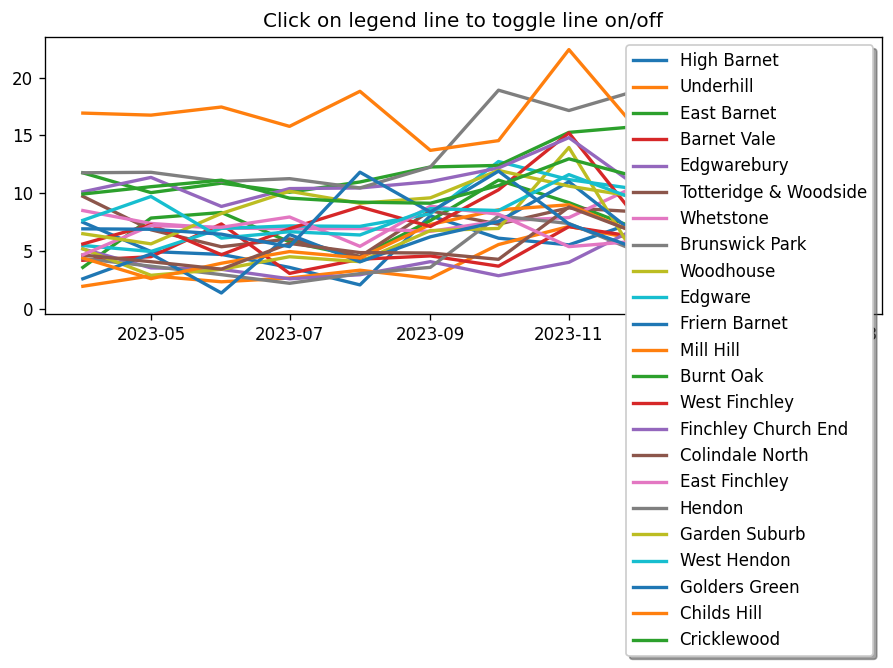

In [255]:
fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1 = ax.plot(y_high_barnet, lw=2, label='High Barnet')
line2 = ax.plot(y_underhill, lw=2, label='Underhill')
line3 = ax.plot(y_east_barnet, lw=2, label='East Barnet')
line4 = ax.plot(y_barnet_vale, lw=2, label='Barnet Vale')
line5 = ax.plot(y_edgwarebury, lw=2, label='Edgwarebury')
line6 = ax.plot(y_totteridge_and_woodside, lw=2, label='Totteridge & Woodside')
line7 = ax.plot(y_whetstone, lw=2, label='Whetstone')
line8 = ax.plot(y_brunswick_park, lw=2, label='Brunswick Park')
line9 = ax.plot(y_woodhouse, lw=2, label='Woodhouse')
line10 = ax.plot(y_edgware, lw=2, label='Edgware')
line11 = ax.plot(y_friern_barnet, lw=2, label='Friern Barnet')
line12 = ax.plot(y_mill_hill, lw=2, label='Mill Hill')
line13 = ax.plot(y_burnt_oak, lw=2, label='Burnt Oak')
line14 = ax.plot(y_west_finchley, lw=2, label='West Finchley')
line15 = ax.plot(y_finchley_church_end, lw=2, label='Finchley Church End')
line16 = ax.plot(y_colindale_north, lw=2, label='Colindale North')
line17 = ax.plot(y_east_finchley, lw=2, label='East Finchley')
line18 = ax.plot(y_hendon, lw=2, label='Hendon')
line19 = ax.plot(y_garden_suburb, lw=2, label='Garden Suburb')
line20 = ax.plot(y_west_hendon, lw=2, label='West Hendon')
line21 = ax.plot(y_golders_green, lw=2, label='Golders Green')
line22 = ax.plot(y_childs_hill, lw=2, label='Childs Hill')
line23 = ax.plot(y_cricklewood, lw=2, label='Cricklewood')
leg = ax.legend(fancybox=True, shadow=True)


lines = [line1, line2, line3, line4, line5, line6, line7, line8, line9, line10, line11, line12, line13, line14, line15, line16, line17,
         line18, line19, line20, line21, line22, line23]
lined = {}  # Will map legend lines to original lines.
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(True)  # Enable picking on the legend line.
    lined[legline] = origline


def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    legline = event.artist
    origline = lined[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    # Change the alpha on the line in the legend, so we can see what lines
    # have been toggled.
    legline.set_alpha(1.0 if visible else 0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)
plt.show()

In [373]:
df_wards_geo = gpd.read_file('wards_barnet.json')
df_wards_geo = df_wards_geo.rename(columns={'WD13NM': 'Wards'})
df_wards_geo = df_wards_geo.set_index('Wards')
df_wards_geo

id     WD13CD WD13CDO  WD13NMW   
Wards                                                        
Brunswick Park       E05000043  E05000043  00ACFX      NaN  \
Burnt Oak            E05000044  E05000044  00ACFY      NaN   
Childs Hill          E05000045  E05000045  00ACFZ      NaN   
Colindale            E05000046  E05000046  00ACGA      NaN   
Coppetts             E05000047  E05000047  00ACGB      NaN   
East Barnet          E05000048  E05000048  00ACGC      NaN   
East Finchley        E05000049  E05000049  00ACGD      NaN   
Edgware              E05000050  E05000050  00ACGE      NaN   
Finchley Church End  E05000051  E05000051  00ACGF      NaN   
Garden Suburb        E05000052  E05000052  00ACGG      NaN   
Golders Green        E05000053  E05000053  00ACGH      NaN   
Hale                 E05000054  E05000054  00ACGJ      NaN   
Hendon               E05000055  E05000055  00ACGK      NaN   
High Barnet          E05000056  E05000056  00ACGL      NaN   
Mill Hill            E05000057  E05000057  00ACGM      NaN   
Oakleigh             E05000058  E05000058  00ACGN      NaN   
Totteridge           E05000059  E05000059  00ACGP      NaN   
Underhill            E05000060  E05000060  00ACGQ      NaN   
West Finchley        E05000061  E05000061  00ACGR      NaN   
West Hendon          E05000062  E05000062  00ACGS      NaN   
Woodhouse            E05000063  E05000063  00ACGT      NaN   

                                                              geometry  
Wards                                                                   
Brunswick Park       POLYGON ((-0.14454 51.61549, -0.15166 51.62278...  
Burnt Oak            POLYGON ((-0.27493 51.60697, -0.27329 51.60771...  
Childs Hill          POLYGON ((-0.18357 51.56801, -0.18382 51.56750...  
Colindale            POLYGON ((-0.24773 51.60720, -0.24743 51.60693...  
Coppetts             POLYGON ((-0.15166 51.62278, -0.14454 51.61549...  
East Barnet          POLYGON ((-0.16224 51.63358, -0.16719 51.63873...  
East Finchley        POLYGON ((-0.18133 51.59615, -0.17693 51.59916...  
Edgware              POLYGON ((-0.27315 51.64119, -0.27106 51.63743...  
Finchley Church End  POLYGON ((-0.22566 51.59895, -0.22529 51.59945...  
Garden Suburb        POLYGON ((-0.18459 51.59440, -0.17914 51.59190...  
Golders Green        POLYGON ((-0.21203 51.58101, -0.20910 51.58698...  
Hale                 POLYGON ((-0.26827 51.64238, -0.26729 51.64284...  
Hendon               POLYGON ((-0.21203 51.58101, -0.21526 51.58298...  
High Barnet          POLYGON ((-0.17556 51.66057, -0.17505 51.65424...  
Mill Hill            POLYGON ((-0.22566 51.59895, -0.23478 51.60139...  
Oakleigh             POLYGON ((-0.18408 51.63995, -0.19001 51.64769...  
Totteridge           POLYGON ((-0.19527 51.61074, -0.19771 51.61196...  
Underhill            POLYGON ((-0.19001 51.64769, -0.18408 51.63995...  
West Finchley        POLYGON ((-0.19527 51.61074, -0.19421 51.61067...  
West Hendon          POLYGON ((-0.24828 51.58436, -0.24286 51.58029...  
Woodhouse            POLYGON ((-0.17693 51.59916, -0.17792 51.60003...

In [394]:
df_ploth = pd.DataFrame(columns=['Wards', 'Burglarys', 'Time'])
df_ploth

Empty DataFrame
Columns: [Wards, Burglarys, Time]
Index: []

In [402]:
indexes = df_forecast.index
for i in indexes:
    for ward in wards_list:
        new_row = [ward, df_forecast.loc[i, ward], i]
        df_ploth.loc[len(df_ploth)] = new_row
    
df_ploth

Wards  Burglarys       Time
0      High Barnet   7.502089 2023-04-01
1        Underhill   1.970533 2023-04-01
2      East Barnet   3.602530 2023-04-01
3      Barnet Vale   4.218363 2023-04-01
4      Edgwarebury   5.200738 2023-04-01
..             ...        ...        ...
823  Garden Suburb   9.667338 2024-03-01
824    West Hendon  10.745439 2024-03-01
825  Golders Green   9.791805 2024-03-01
826    Childs Hill  16.994575 2024-03-01
827    Cricklewood  11.017400 2024-03-01

[828 rows x 3 columns]

In [347]:
df_month = df_forecast.loc[['2023-04-01']]
df_month = df_month.reset_index()
df_month = df_month.drop(columns='month')
df_month_trans = df_month.transpose()
df_month_trans = df_month_trans.reset_index()
df_month_trans = df_month_trans.rename(columns={'index' : 'Ward', 0 : 'Burglarys'})
df_month_trans = df_month_trans.drop(23)
df_month_trans

Ward  Burglarys
0             High Barnet   7.502089
1               Underhill   1.970533
2             East Barnet   3.602530
3             Barnet Vale   4.218363
4             Edgwarebury   5.200738
5   Totteridge & Woodside   9.741920
6               Whetstone   8.515600
7          Brunswick Park   4.358898
8               Woodhouse   5.204478
9                 Edgware   5.497707
10          Friern Barnet   2.618814
11              Mill Hill   4.411801
12              Burnt Oak  11.775549
13          West Finchley   5.626941
14    Finchley Church End  10.134540
15        Colindale North   4.668169
16          East Finchley   4.687821
17                 Hendon  11.779922
18          Garden Suburb   6.511973
19            West Hendon   7.668875
20          Golders Green   6.933829
21            Childs Hill  16.936576
22            Cricklewood   9.941735